# English only

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
ratio = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [2]:
acc_list_scratch = []
auroc_list_scratch = []
for i in range(11):
    if i == 0:
        ood_df = pd.read_pickle("../english_only/test_descriptions_scratch")
        temp = ood_df.copy()
    elif i == 10:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_1.0_scratch")
    else:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_0.{}_scratch".format(i))
    acc_list_scratch.append(sum(ood_df['gt'] == ood_df['pred']) / len(ood_df['gt']))
    
    argmax_prob_0 = np.array(list(ood_df[(ood_df['gt'] == 0)]['argmax_prob'])).reshape(-1)
    
    argmax_prob_1_0 = np.array(list(temp[temp['gt'] == 0]['argmax_prob'])).reshape(-1)
    argmax_prob_1_1 = np.array(list(ood_df[ood_df['gt'] == 1]['argmax_prob'])).reshape(-1)
    argmax_prob_1_2 = np.array(list(ood_df[ood_df['gt'] == 2]['argmax_prob'])).reshape(-1)
    argmax_prob_1 = np.concatenate((argmax_prob_1_0, argmax_prob_1_1, argmax_prob_1_2), 0)
    all_max_prob = np.concatenate((argmax_prob_1, argmax_prob_0))
    
    label_1 = np.ones(len(argmax_prob_1))
    label_0 = np.zeros(len(argmax_prob_0))
    all_label = np.concatenate((label_1, label_0))
    
    auroc_list_scratch.append(roc_auc_score(all_label, all_max_prob))

In [3]:
acc_list_pre = []
auroc_list_pre = []
for i in range(11):
    if i == 0:
        ood_df = pd.read_pickle("../english_only/test_descriptions_pretrain")
        temp = ood_df.copy()
    elif i == 10:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_1.0_pretrain")
    else:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_0.{}_pretrain".format(i))
    acc_list_pre.append(sum(ood_df['gt'] == ood_df['pred']) / len(ood_df['gt']))
    
    argmax_prob_0 = np.array(list(ood_df[(ood_df['gt'] == 0)]['argmax_prob'])).reshape(-1)
    
    argmax_prob_1_0 = np.array(list(temp[temp['gt'] == 0]['argmax_prob'])).reshape(-1)
    argmax_prob_1_1 = np.array(list(ood_df[ood_df['gt'] == 1]['argmax_prob'])).reshape(-1)
    argmax_prob_1_2 = np.array(list(ood_df[ood_df['gt'] == 2]['argmax_prob'])).reshape(-1)
    argmax_prob_1 = np.concatenate((argmax_prob_1_0, argmax_prob_1_1, argmax_prob_1_2), 0)
    all_max_prob = np.concatenate((argmax_prob_1, argmax_prob_0))
    
    label_1 = np.ones(len(argmax_prob_1))
    label_0 = np.zeros(len(argmax_prob_0))
    all_label = np.concatenate((label_1, label_0))
    
    auroc_list_pre.append(roc_auc_score(all_label, all_max_prob))

### AUROC plot (max)

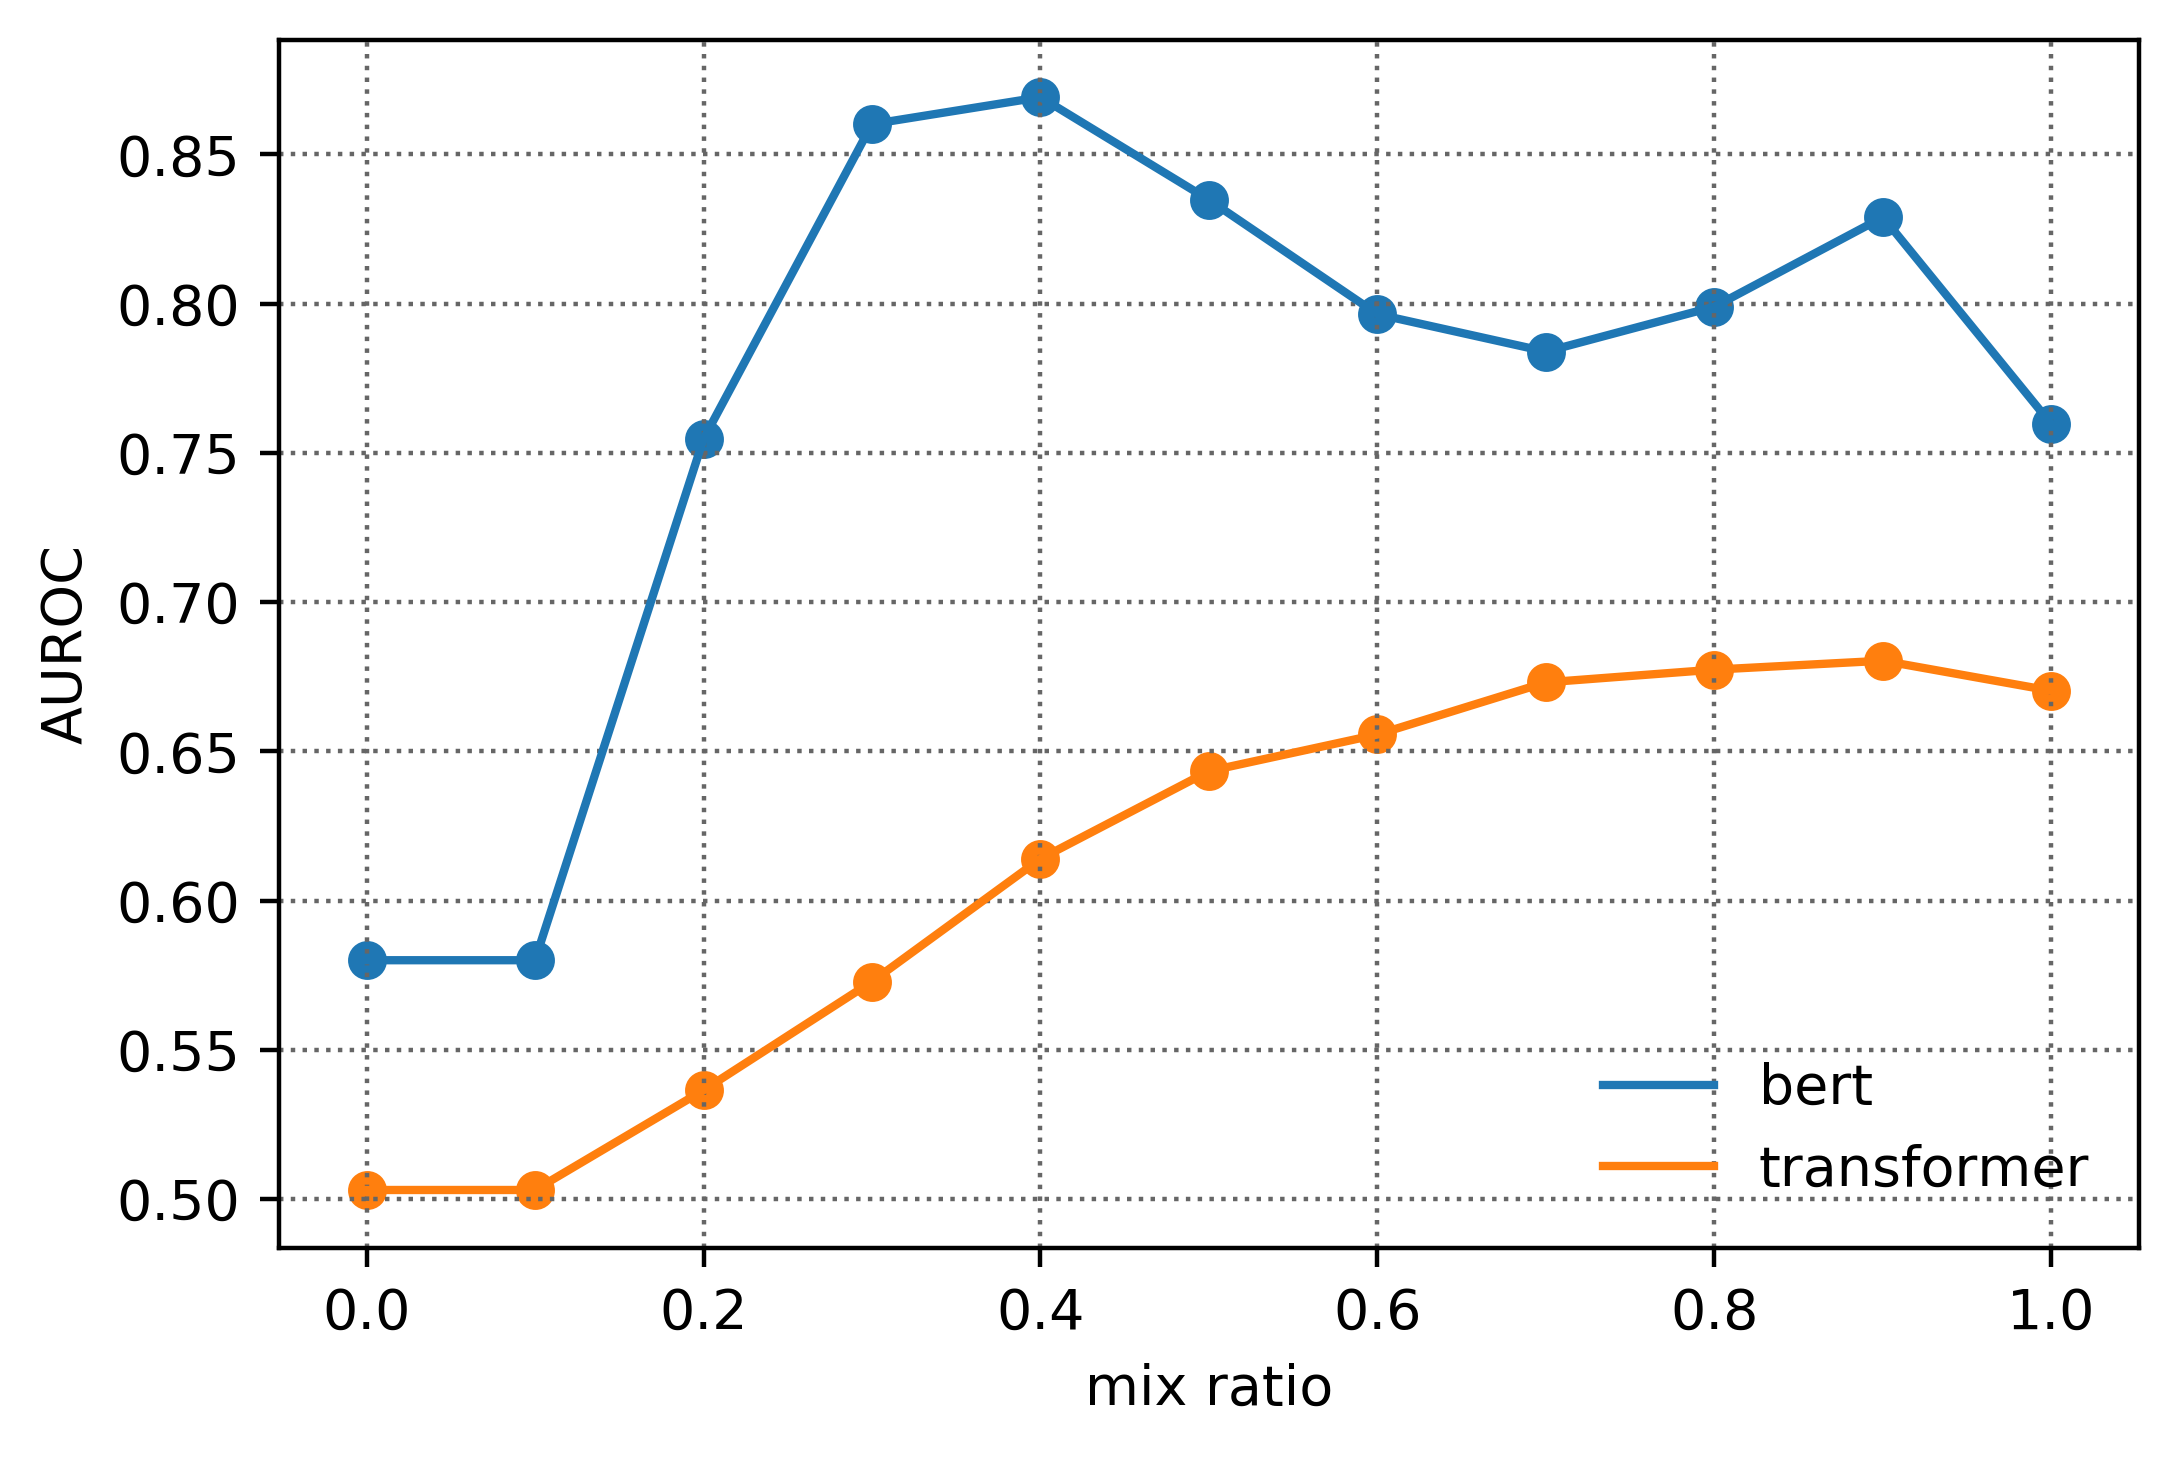

In [4]:
plt.figure(dpi=400)
plt.grid(b=False, which='major', color='#666666', linestyle=':')
plt.plot(ratio, auroc_list_pre, label='bert')
plt.scatter(ratio, auroc_list_pre)
plt.plot(ratio, auroc_list_scratch, label='transformer')
plt.scatter(ratio, auroc_list_scratch)
plt.xlabel('mix ratio')
plt.ylabel('AUROC')
plt.legend(frameon=False)
# plt.savefig('auroc_eng.png', dpi=400)

### Accuracy plot (max)

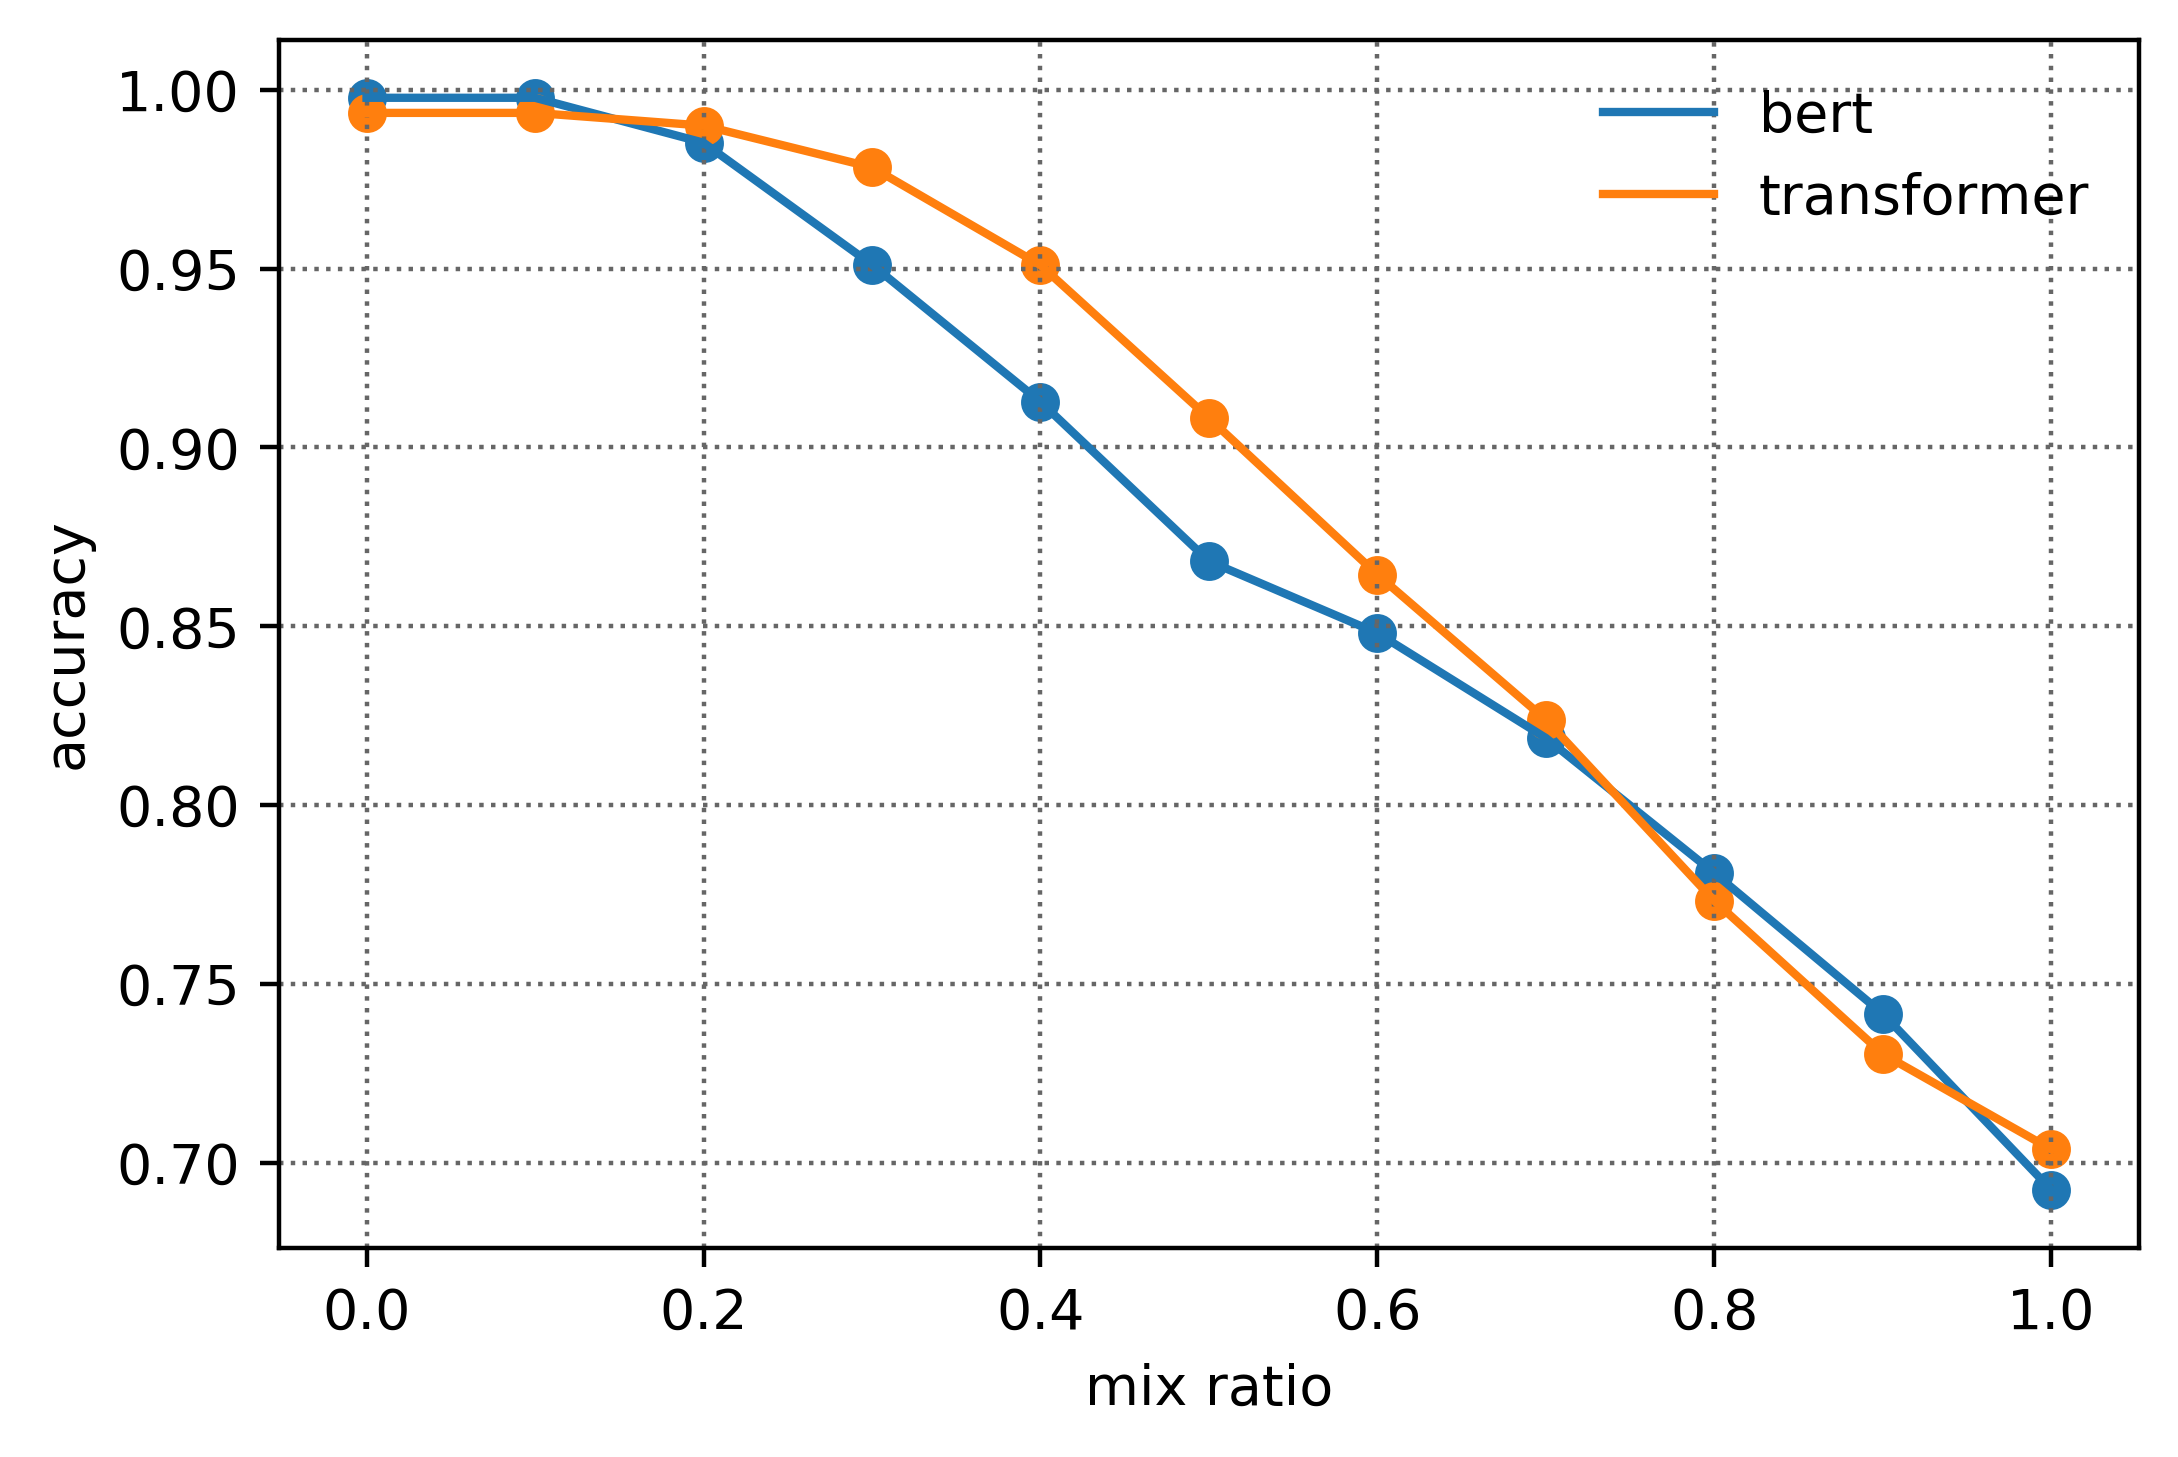

In [6]:
plt.figure(dpi=400)
plt.grid(b=False, which='major', color='#666666', linestyle=':')
plt.plot(ratio, acc_list_pre, label='bert')
plt.scatter(ratio, acc_list_pre)
plt.plot(ratio, acc_list_scratch, label='transformer')
plt.scatter(ratio, acc_list_scratch)
plt.xlabel('mix ratio')
plt.ylabel('accuracy')
plt.legend(frameon=False)
# plt.savefig('auroc_eng.png', dpi=400)

In [5]:
acc_list_scratch_md = []
auroc_list_scratch_md = []
for i in range(11):
    if i == 0:
        ood_df = pd.read_pickle("../english_only/test_descriptions_scratch")
        # temp = ood_df.copy()
    elif i == 10:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_1.0_scratch")
    else:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_0.{}_scratch".format(i))
    acc_list_scratch_md.append(sum(ood_df['gt'] == ood_df['pred']) / len(ood_df['gt']))
    
    argmax_prob_0 = np.array(list(ood_df[(ood_df['gt'] == 0)]['md'])).reshape(-1)
    
    temp = pd.read_pickle("../english_only/test_descriptions_scratch")
    argmax_prob_1_0 = np.array(list(temp[temp['gt'] == 0]['md'])).reshape(-1)
    argmax_prob_1_1 = np.array(list(ood_df[ood_df['gt'] == 1]['md'])).reshape(-1)
    argmax_prob_1_2 = np.array(list(ood_df[ood_df['gt'] == 2]['md'])).reshape(-1)
    argmax_prob_1 = np.concatenate((argmax_prob_1_0, argmax_prob_1_1, argmax_prob_1_2), 0)
    all_max_prob = np.concatenate((-argmax_prob_1, -argmax_prob_0))
    
    label_1 = np.ones(len(argmax_prob_1))
    label_0 = np.zeros(len(argmax_prob_0))
    all_label = np.concatenate((label_1, label_0))
    
    auroc_list_scratch_md.append(roc_auc_score(all_label, all_max_prob))

In [7]:
acc_list_pre_md = []
auroc_list_pre_md = []
for i in range(11):
    if i == 0:
        ood_df = pd.read_pickle("../english_only/test_descriptions_pretrain")
        # temp = ood_df.copy()
    elif i == 10:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_1.0_pretrain")
    else:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_0.{}_pretrain".format(i))
    acc_list_pre_md.append(sum(ood_df['gt'] == ood_df['pred']) / len(ood_df['gt']))
    
    argmax_prob_0 = np.array(list(ood_df[(ood_df['gt'] == 0)]['md'])).reshape(-1)
    
    temp = pd.read_pickle("../english_only/test_descriptions_pretrain")
    argmax_prob_1_0 = np.array(list(temp[temp['gt'] == 0]['md'])).reshape(-1)
    argmax_prob_1_1 = np.array(list(ood_df[ood_df['gt'] == 1]['md'])).reshape(-1)
    argmax_prob_1_2 = np.array(list(ood_df[ood_df['gt'] == 2]['md'])).reshape(-1)
    argmax_prob_1 = np.concatenate((argmax_prob_1_0, argmax_prob_1_1, argmax_prob_1_2), 0)
    all_max_prob = np.concatenate((-argmax_prob_1, -argmax_prob_0))
    
    label_1 = np.ones(len(argmax_prob_1))
    label_0 = np.zeros(len(argmax_prob_0))
    all_label = np.concatenate((label_1, label_0))
    
    auroc_list_pre_md.append(roc_auc_score(all_label, all_max_prob))

### AUROC plot (mahala)

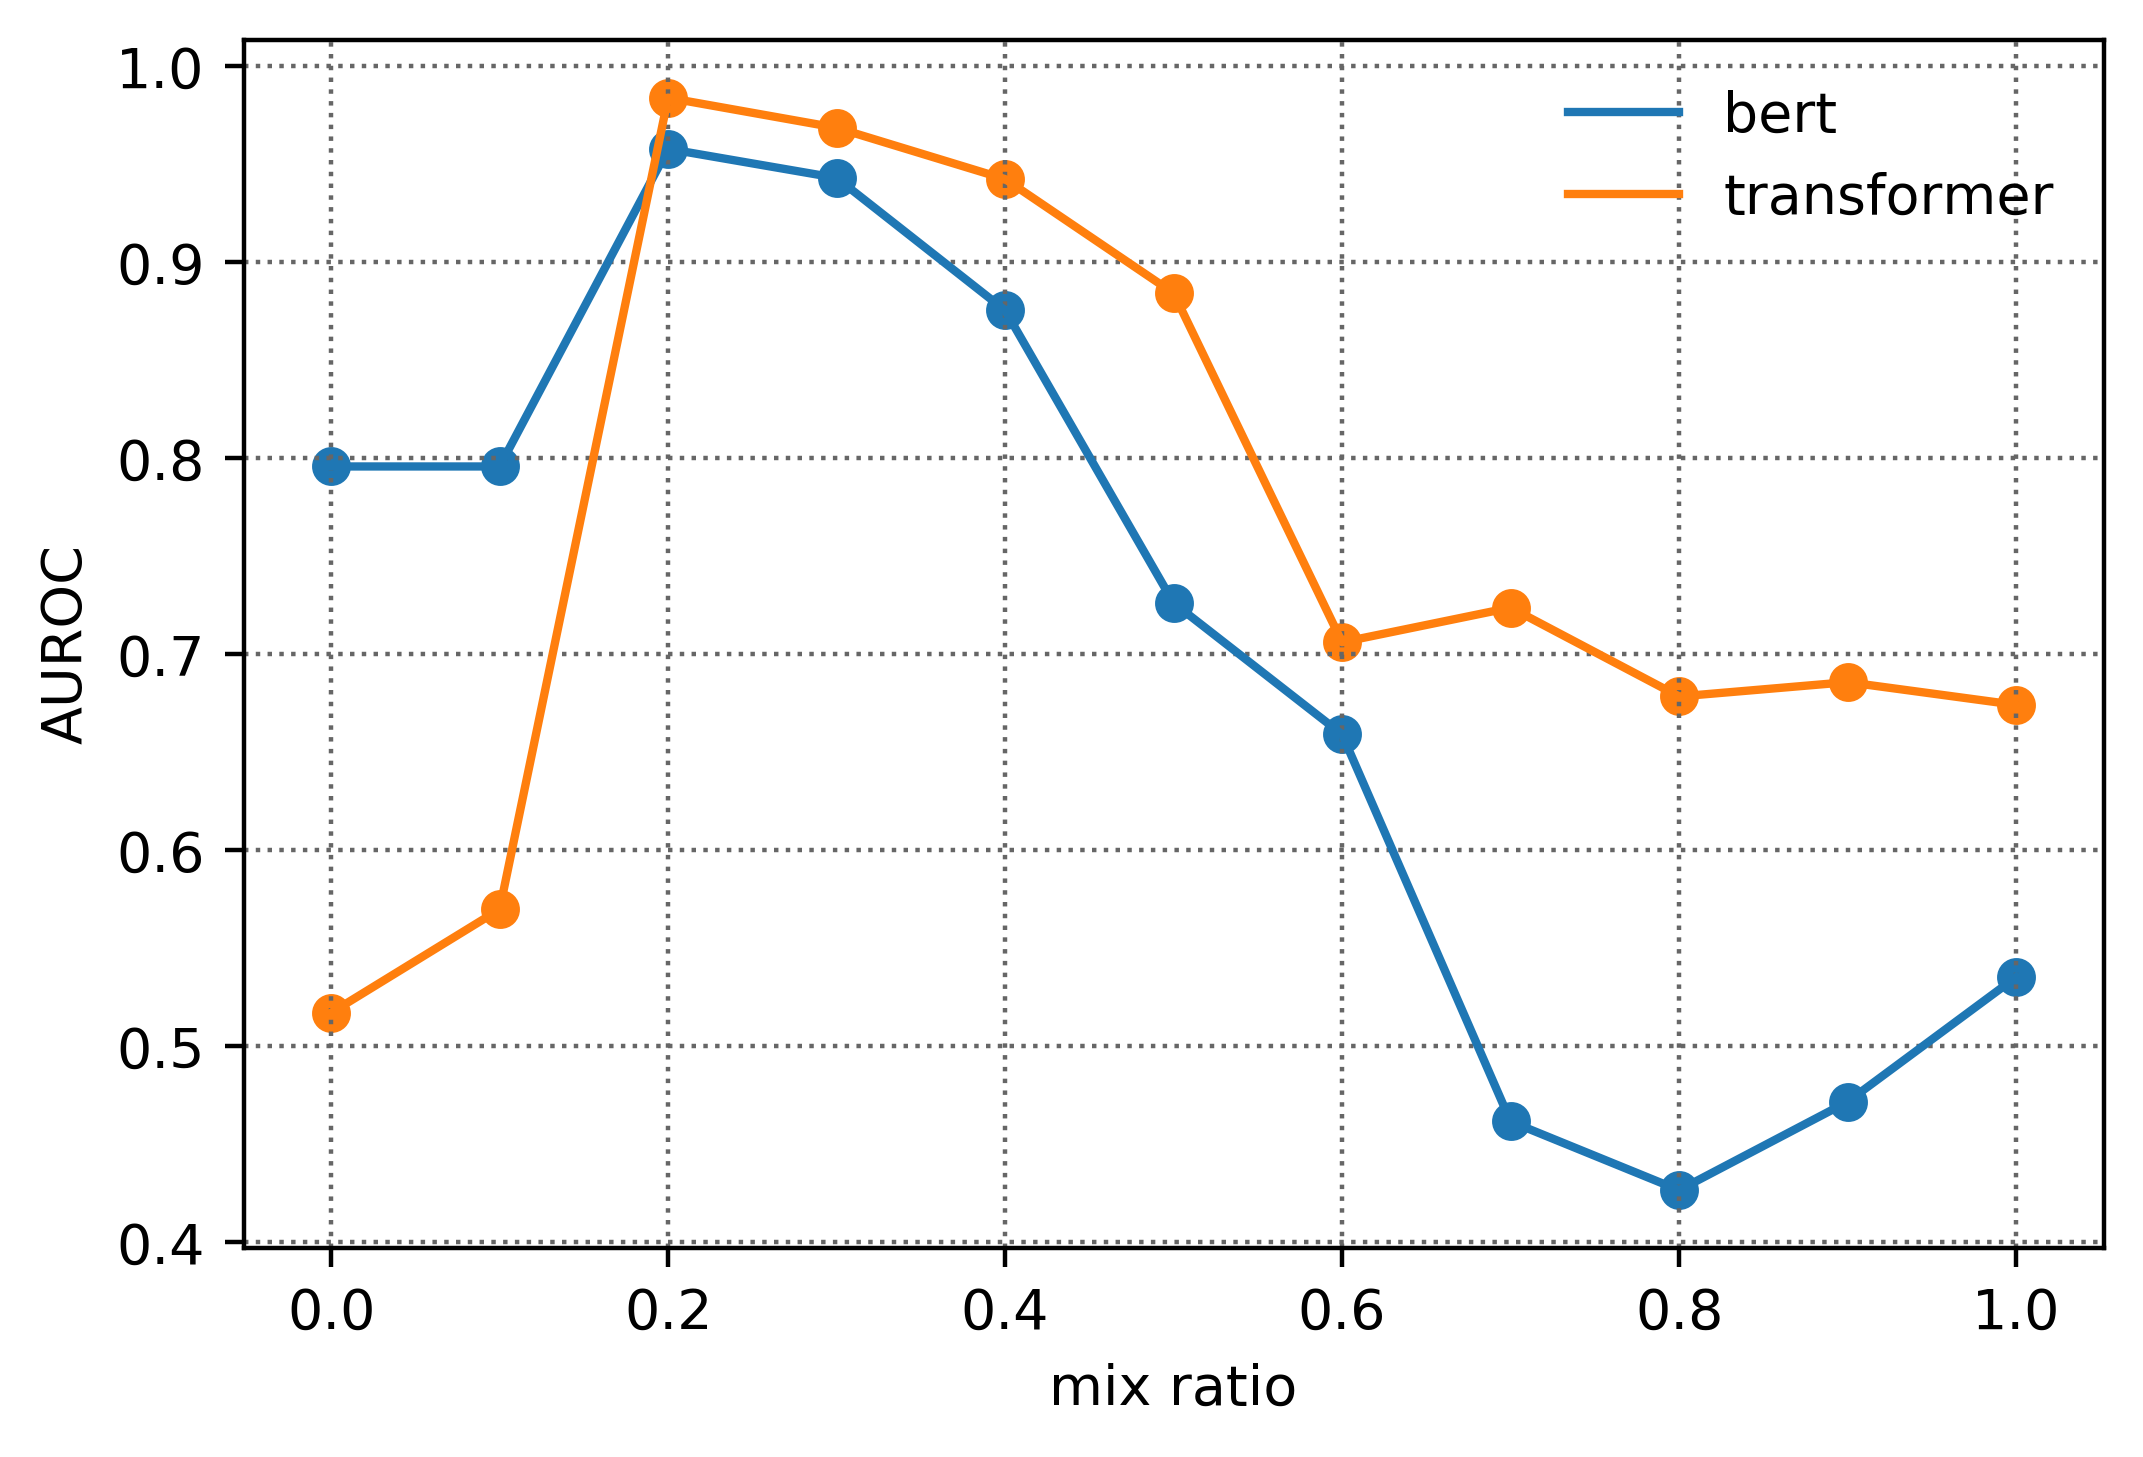

In [8]:
plt.figure(dpi=400)
plt.grid(b=False, which='major', color='#666666', linestyle=':')
plt.plot(ratio, auroc_list_pre_md, label='bert')
plt.scatter(ratio, auroc_list_pre_md)
plt.plot(ratio, auroc_list_scratch_md, label='transformer')
plt.scatter(ratio, auroc_list_scratch_md)
plt.xlabel('mix ratio')
plt.ylabel('AUROC')
plt.legend(frameon=False)
# plt.savefig('auroc_eng.png', dpi=400)

### Accuracy plot (mahala)

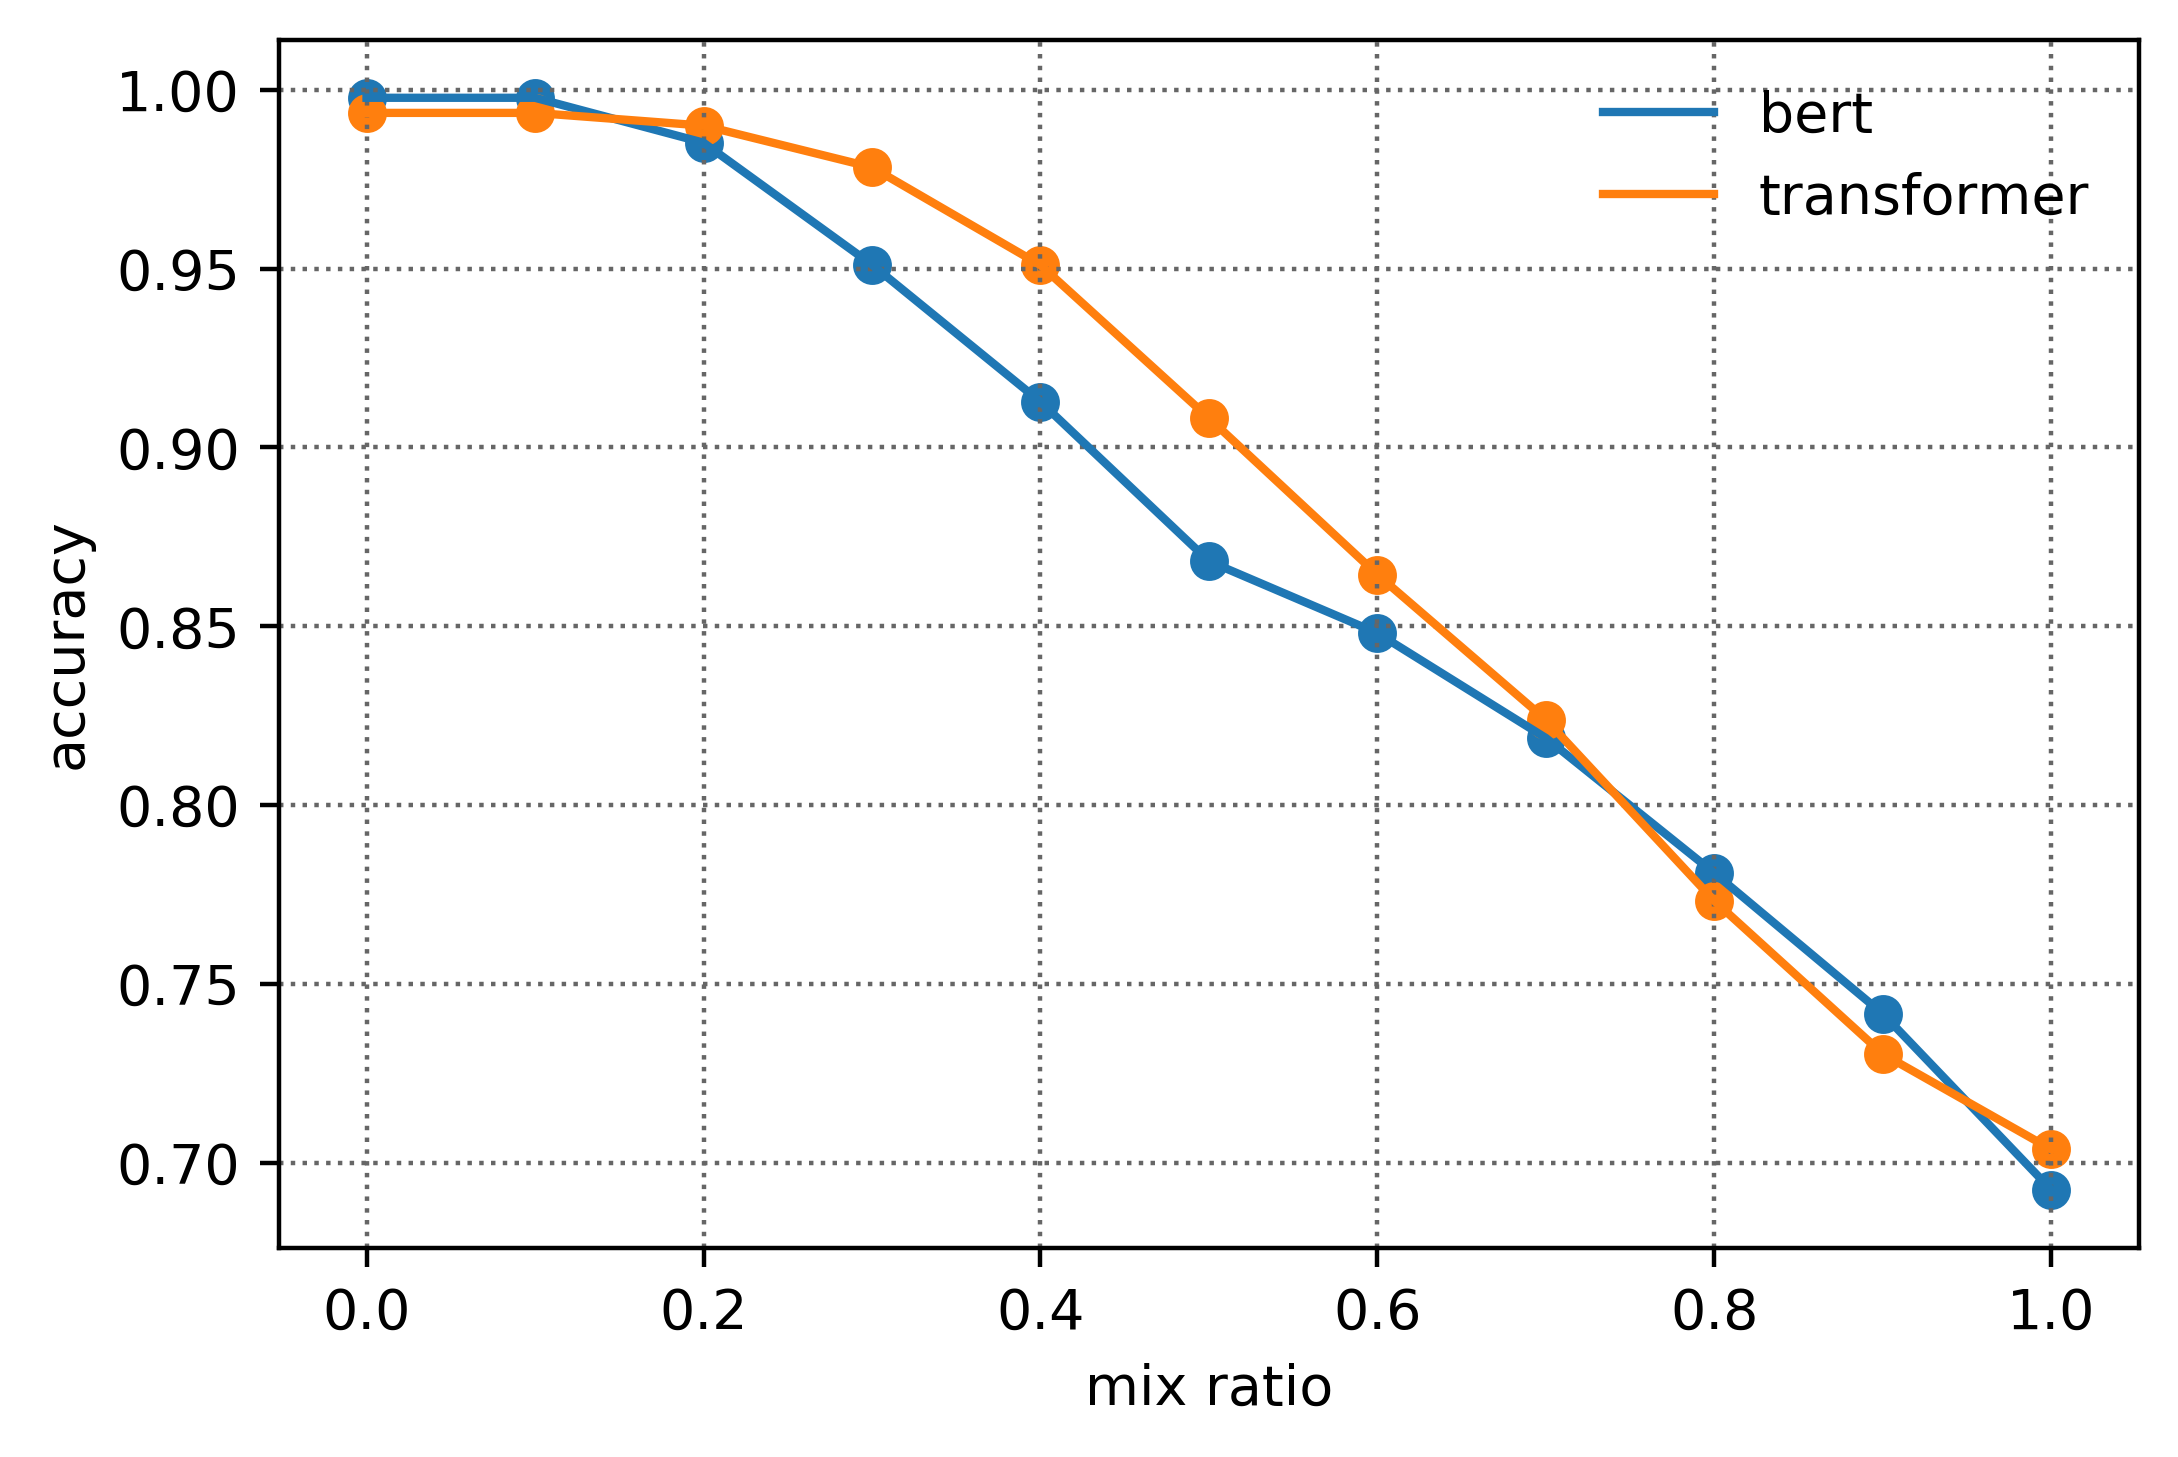

In [9]:
plt.figure(dpi=400)
plt.grid(b=False, which='major', color='#666666', linestyle=':')
plt.plot(ratio, acc_list_pre_md, label='bert')
plt.scatter(ratio, acc_list_pre_md)
plt.plot(ratio, acc_list_scratch_md, label='transformer')
plt.scatter(ratio, acc_list_scratch_md)
plt.xlabel('mix ratio')
plt.ylabel('accuracy')
plt.legend(frameon=False)
# plt.savefig('auroc_eng.png', dpi=400)

### AUROC plot (max, mahala)

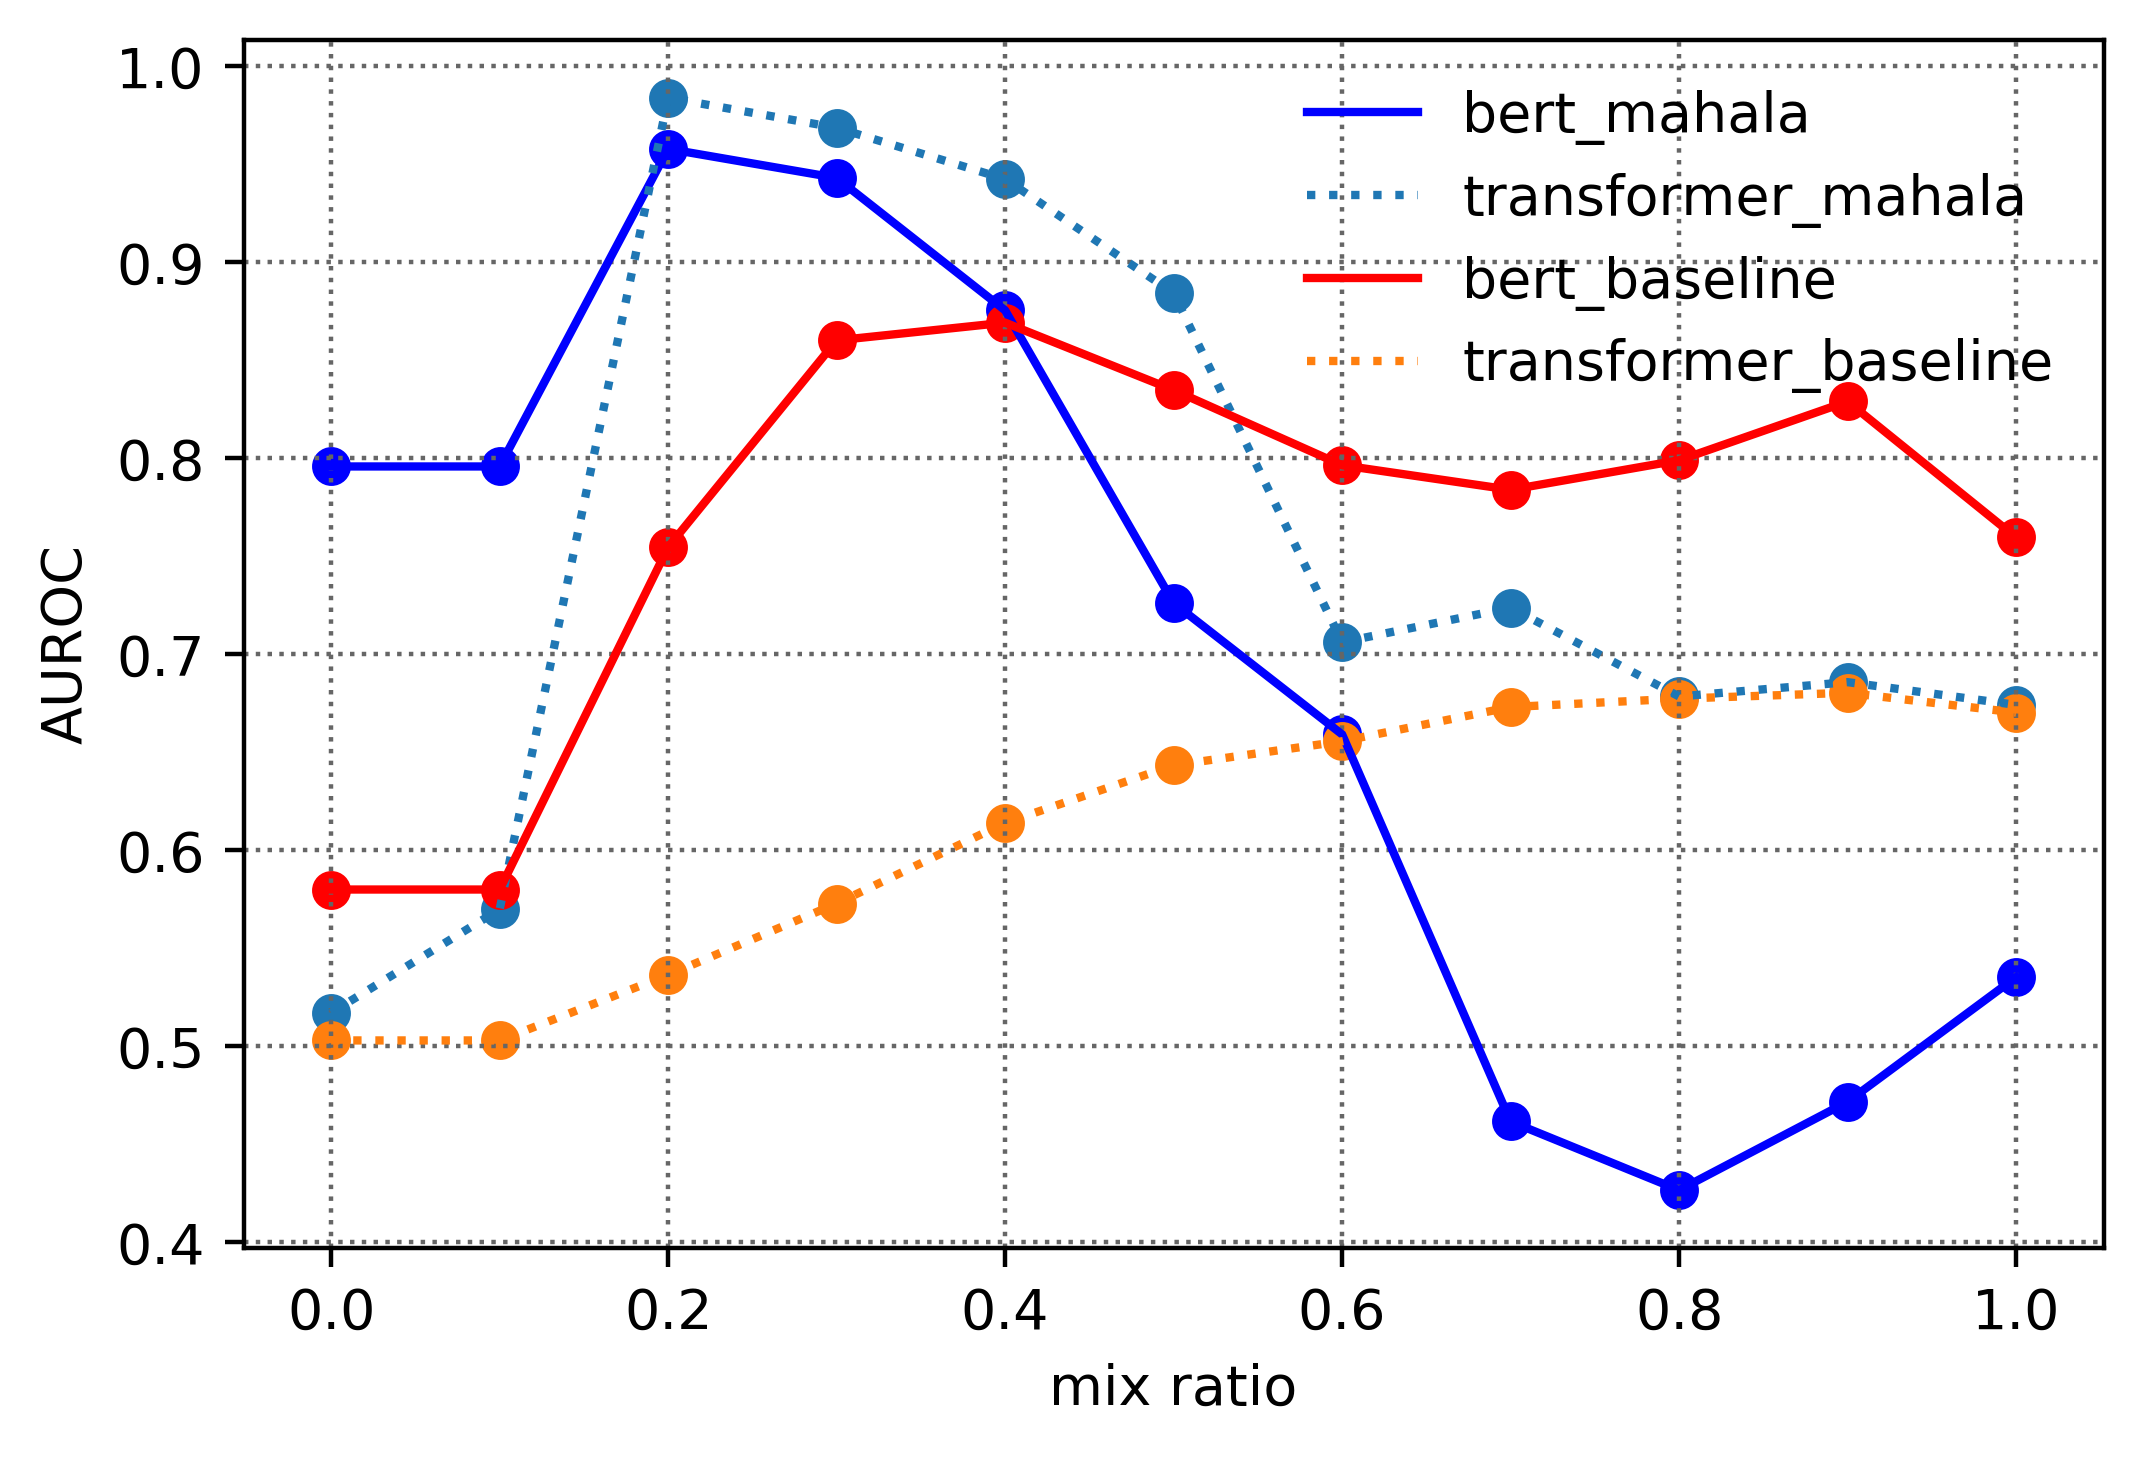

In [10]:
plt.figure(dpi=400)
plt.grid(b=False, which='major', color='#666666', linestyle=':')
plt.plot(ratio, auroc_list_pre_md, label='bert_mahala', color='blue')
plt.scatter(ratio, auroc_list_pre_md, color='blue')
plt.plot(ratio, auroc_list_scratch_md, label='transformer_mahala', linestyle=':')
plt.scatter(ratio, auroc_list_scratch_md)
plt.plot(ratio, auroc_list_pre, label='bert_baseline', color='red')
plt.scatter(ratio, auroc_list_pre, color='red')
plt.plot(ratio, auroc_list_scratch, label='transformer_baseline', linestyle=':')
plt.scatter(ratio, auroc_list_scratch)
plt.xlabel('mix ratio')
plt.ylabel('AUROC')
plt.legend(frameon=False)
plt.savefig('auroc_eng_all.png', dpi=400)

# Each language

## English (i.e., OOD: English + Viet   /   In: English)

In [11]:
acc_list_scratch = []
auroc_list_scratch = []
for i in range(11):
    if i == 0:
        ood_df = pd.read_pickle("../english_only/test_descriptions_scratch")
        temp = ood_df.copy()
    elif i == 10:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_1.0_scratch")
    else:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_0.{}_scratch".format(i))
    acc_list_scratch.append(sum(ood_df['gt'] == ood_df['pred']) / len(ood_df['gt']))
    
    argmax_prob_0 = np.array(list(ood_df[(ood_df['gt'] == 0)]['argmax_prob'])).reshape(-1)
    
    argmax_prob_1 = np.array(list(temp[temp['gt'] == 0]['argmax_prob'])).reshape(-1)
#     argmax_prob_1_1 = np.array(list(ood_df[ood_df['gt'] == 1]['argmax_prob'])).reshape(-1)
#     argmax_prob_1_2 = np.array(list(ood_df[ood_df['gt'] == 2]['argmax_prob'])).reshape(-1)
#     argmax_prob_1 = np.concatenate((argmax_prob_1_0, argmax_prob_1_1, argmax_prob_1_2), 0)
    all_max_prob = np.concatenate((argmax_prob_1, argmax_prob_0))
    
    label_1 = np.ones(len(argmax_prob_1))
    label_0 = np.zeros(len(argmax_prob_0))
    all_label = np.concatenate((label_1, label_0))
    
    auroc_list_scratch.append(roc_auc_score(all_label, all_max_prob))

In [12]:
acc_list_pre = []
auroc_list_pre = []
for i in range(11):
    if i == 0:
        ood_df = pd.read_pickle("../english_only/test_descriptions_pretrain")
        temp = ood_df.copy()
    elif i == 10:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_1.0_pretrain")
    else:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_0.{}_pretrain".format(i))
    acc_list_pre.append(sum(ood_df['gt'] == ood_df['pred']) / len(ood_df['gt']))
    
    argmax_prob_0 = np.array(list(ood_df[(ood_df['gt'] == 0)]['argmax_prob'])).reshape(-1)
    
    argmax_prob_1 = np.array(list(temp[temp['gt'] == 0]['argmax_prob'])).reshape(-1)
#     argmax_prob_1_1 = np.array(list(ood_df[ood_df['gt'] == 1]['argmax_prob'])).reshape(-1)
#     argmax_prob_1_2 = np.array(list(ood_df[ood_df['gt'] == 2]['argmax_prob'])).reshape(-1)
#     argmax_prob_1 = np.concatenate((argmax_prob_1_0, argmax_prob_1_1, argmax_prob_1_2), 0)
    all_max_prob = np.concatenate((argmax_prob_1, argmax_prob_0))
    
    label_1 = np.ones(len(argmax_prob_1))
    label_0 = np.zeros(len(argmax_prob_0))
    all_label = np.concatenate((label_1, label_0))
    
    auroc_list_pre.append(roc_auc_score(all_label, all_max_prob))

### AUROC plot (max)

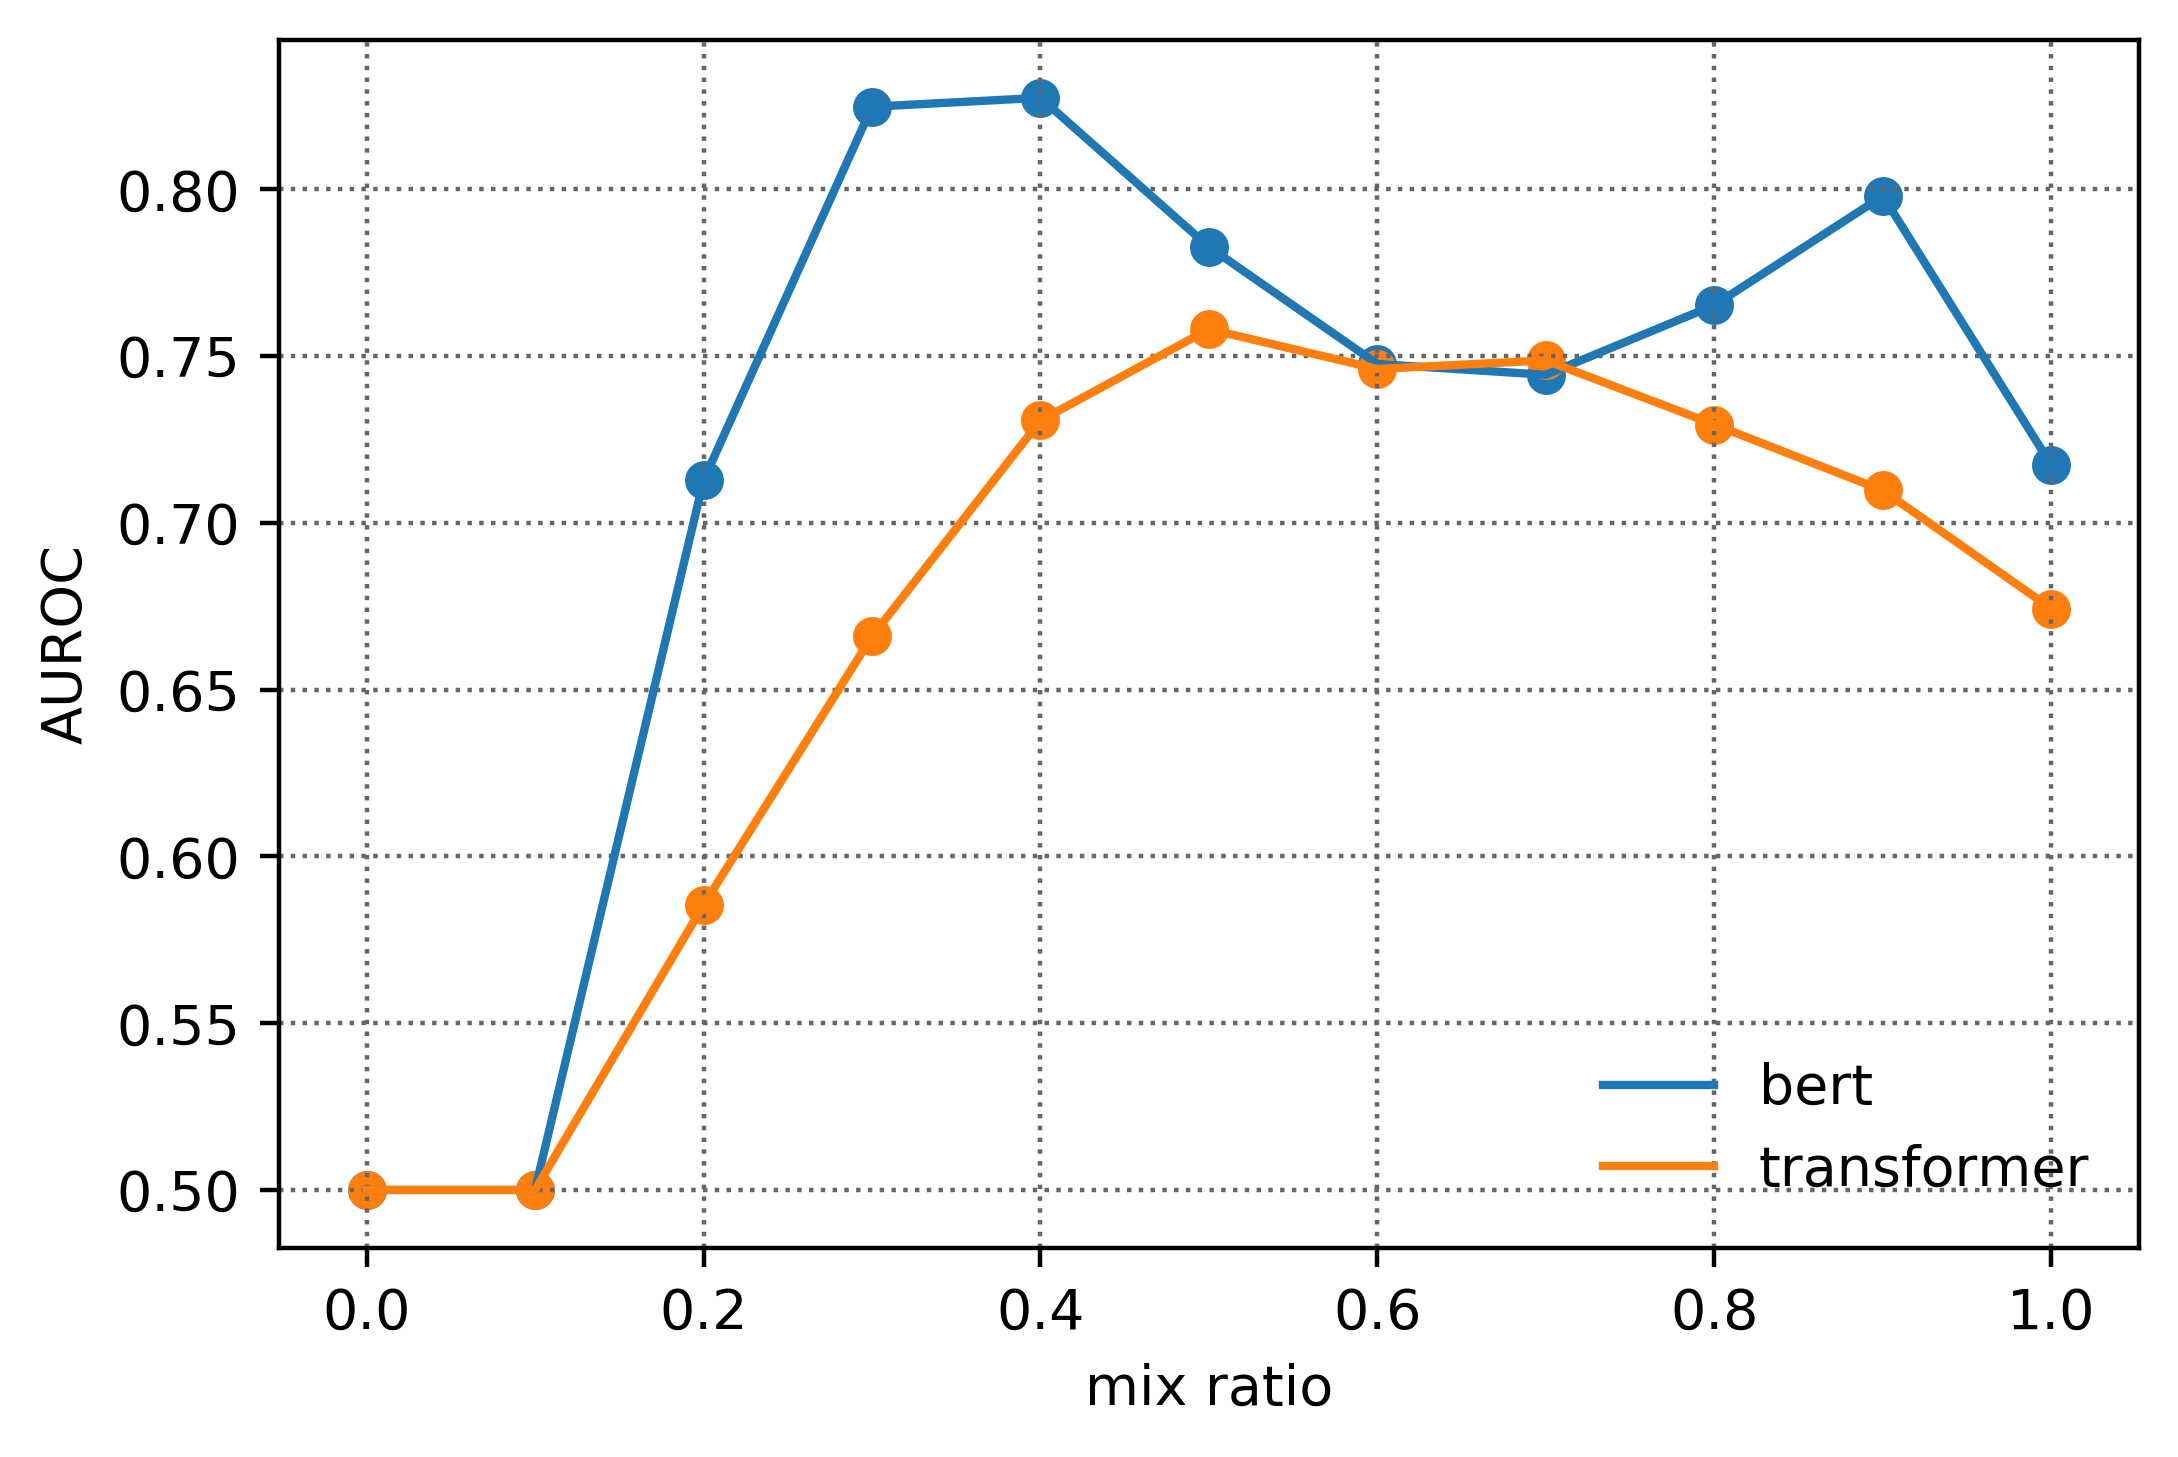

In [13]:
plt.figure(dpi=400)
plt.grid(b=False, which='major', color='#666666', linestyle=':')
plt.plot(ratio, auroc_list_pre, label='bert')
plt.scatter(ratio, auroc_list_pre)
plt.plot(ratio, auroc_list_scratch, label='transformer')
plt.scatter(ratio, auroc_list_scratch)
plt.xlabel('mix ratio')
plt.ylabel('AUROC')
plt.legend(frameon=False)
# plt.savefig('auroc_eng.png', dpi=400)

In [14]:
acc_list_scratch_md = []
auroc_list_scratch_md = []
for i in range(11):
    if i == 0:
        ood_df = pd.read_pickle("../english_only/test_descriptions_scratch")
        # temp = ood_df.copy()
    elif i == 10:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_1.0_scratch")
    else:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_0.{}_scratch".format(i))
    acc_list_scratch_md.append(sum(ood_df['gt'] == ood_df['pred']) / len(ood_df['gt']))
    
    argmax_prob_0 = np.array(list(ood_df[(ood_df['gt'] == 0)]['md'])).reshape(-1)
    
    temp = pd.read_pickle("../english_only/test_descriptions_scratch")
    argmax_prob_1 = np.array(list(temp[temp['gt'] == 0]['md'])).reshape(-1)
#     argmax_prob_1_1 = np.array(list(ood_df[ood_df['gt'] == 1]['md'])).reshape(-1)
#     argmax_prob_1_2 = np.array(list(ood_df[ood_df['gt'] == 2]['md'])).reshape(-1)
#     argmax_prob_1 = np.concatenate((argmax_prob_1_0, argmax_prob_1_1, argmax_prob_1_2), 0)
    all_max_prob = np.concatenate((-argmax_prob_1, -argmax_prob_0))
    
    label_1 = np.ones(len(argmax_prob_1))
    label_0 = np.zeros(len(argmax_prob_0))
    all_label = np.concatenate((label_1, label_0))
    
    auroc_list_scratch_md.append(roc_auc_score(all_label, all_max_prob))

In [15]:
acc_list_pre_md = []
auroc_list_pre_md = []
for i in range(11):
    if i == 0:
        ood_df = pd.read_pickle("../english_only/test_descriptions_pretrain")
        # temp = ood_df.copy()
    elif i == 10:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_1.0_pretrain")
    else:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_0.{}_pretrain".format(i))
    acc_list_pre_md.append(sum(ood_df['gt'] == ood_df['pred']) / len(ood_df['gt']))
    
    argmax_prob_0 = np.array(list(ood_df[(ood_df['gt'] == 0)]['md'])).reshape(-1)
    
    temp = pd.read_pickle("../english_only/test_descriptions_pretrain")
    argmax_prob_1 = np.array(list(temp[temp['gt'] == 0]['md'])).reshape(-1)
#     argmax_prob_1_1 = np.array(list(ood_df[ood_df['gt'] == 1]['md'])).reshape(-1)
#     argmax_prob_1_2 = np.array(list(ood_df[ood_df['gt'] == 2]['md'])).reshape(-1)
#     argmax_prob_1 = np.concatenate((argmax_prob_1_0, argmax_prob_1_1, argmax_prob_1_2), 0)
    all_max_prob = np.concatenate((-argmax_prob_1, -argmax_prob_0))
    
    label_1 = np.ones(len(argmax_prob_1))
    label_0 = np.zeros(len(argmax_prob_0))
    all_label = np.concatenate((label_1, label_0))
    
    auroc_list_pre_md.append(roc_auc_score(all_label, all_max_prob))

### AUROC plot (mahala)

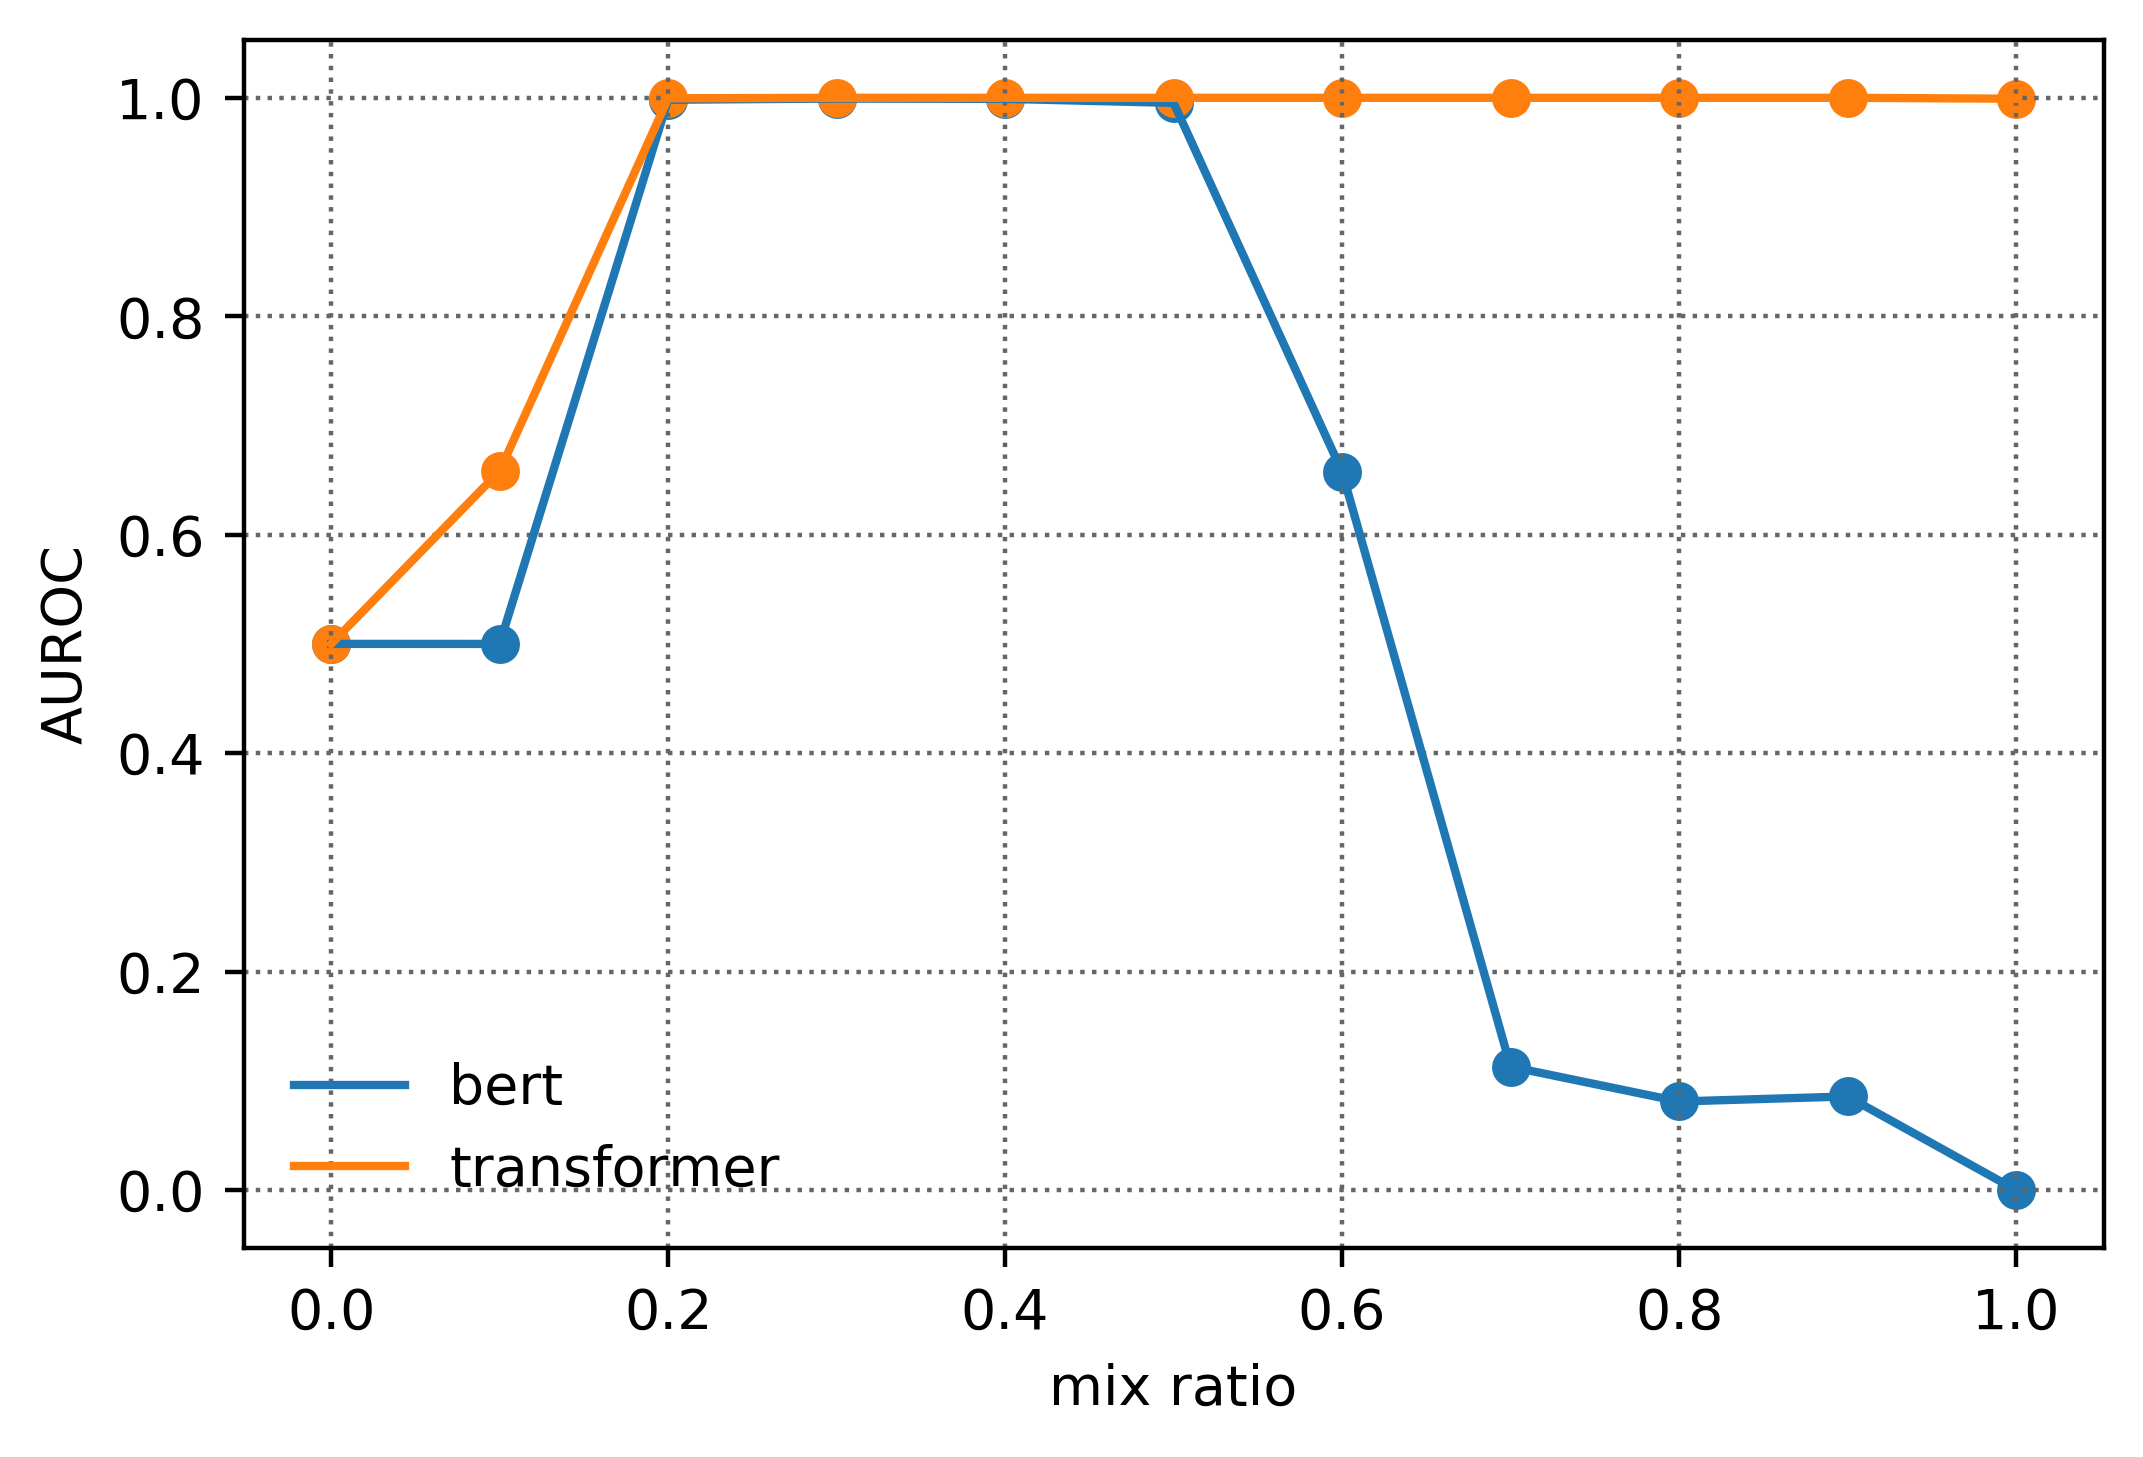

In [16]:
plt.figure(dpi=400)
plt.grid(b=False, which='major', color='#666666', linestyle=':')
plt.plot(ratio, auroc_list_pre_md, label='bert')
plt.scatter(ratio, auroc_list_pre_md)
plt.plot(ratio, auroc_list_scratch_md, label='transformer')
plt.scatter(ratio, auroc_list_scratch_md)
plt.xlabel('mix ratio')
plt.ylabel('AUROC')
plt.legend(frameon=False)
# plt.savefig('auroc_eng.png', dpi=400)

## French (i.e., OOD: English + Viet   /   In: French)

In [17]:
acc_list_scratch = []
auroc_list_scratch = []
for i in range(11):
    if i == 0:
        ood_df = pd.read_pickle("../english_only/test_descriptions_scratch")
        temp = ood_df.copy()
    elif i == 10:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_1.0_scratch")
    else:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_0.{}_scratch".format(i))
    acc_list_scratch.append(sum(ood_df['gt'] == ood_df['pred']) / len(ood_df['gt']))
    
    argmax_prob_0 = np.array(list(ood_df[(ood_df['gt'] == 0)]['argmax_prob'])).reshape(-1)
    
    argmax_prob_1 = np.array(list(temp[temp['gt'] == 1]['argmax_prob'])).reshape(-1)
#     argmax_prob_1_1 = np.array(list(ood_df[ood_df['gt'] == 1]['argmax_prob'])).reshape(-1)
#     argmax_prob_1_2 = np.array(list(ood_df[ood_df['gt'] == 2]['argmax_prob'])).reshape(-1)
#     argmax_prob_1 = np.concatenate((argmax_prob_1_0, argmax_prob_1_1, argmax_prob_1_2), 0)
    all_max_prob = np.concatenate((argmax_prob_1, argmax_prob_0))
    
    label_1 = np.ones(len(argmax_prob_1))
    label_0 = np.zeros(len(argmax_prob_0))
    all_label = np.concatenate((label_1, label_0))
    
    auroc_list_scratch.append(roc_auc_score(all_label, all_max_prob))

In [18]:
acc_list_pre = []
auroc_list_pre = []
for i in range(11):
    if i == 0:
        ood_df = pd.read_pickle("../english_only/test_descriptions_pretrain")
        temp = ood_df.copy()
    elif i == 10:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_1.0_pretrain")
    else:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_0.{}_pretrain".format(i))
    acc_list_pre.append(sum(ood_df['gt'] == ood_df['pred']) / len(ood_df['gt']))
    
    argmax_prob_0 = np.array(list(ood_df[(ood_df['gt'] == 0)]['argmax_prob'])).reshape(-1)
    
    argmax_prob_1 = np.array(list(temp[temp['gt'] == 1]['argmax_prob'])).reshape(-1)
#     argmax_prob_1_1 = np.array(list(ood_df[ood_df['gt'] == 1]['argmax_prob'])).reshape(-1)
#     argmax_prob_1_2 = np.array(list(ood_df[ood_df['gt'] == 2]['argmax_prob'])).reshape(-1)
#     argmax_prob_1 = np.concatenate((argmax_prob_1_0, argmax_prob_1_1, argmax_prob_1_2), 0)
    all_max_prob = np.concatenate((argmax_prob_1, argmax_prob_0))
    
    label_1 = np.ones(len(argmax_prob_1))
    label_0 = np.zeros(len(argmax_prob_0))
    all_label = np.concatenate((label_1, label_0))
    
    auroc_list_pre.append(roc_auc_score(all_label, all_max_prob))

### AUROC plot (max)

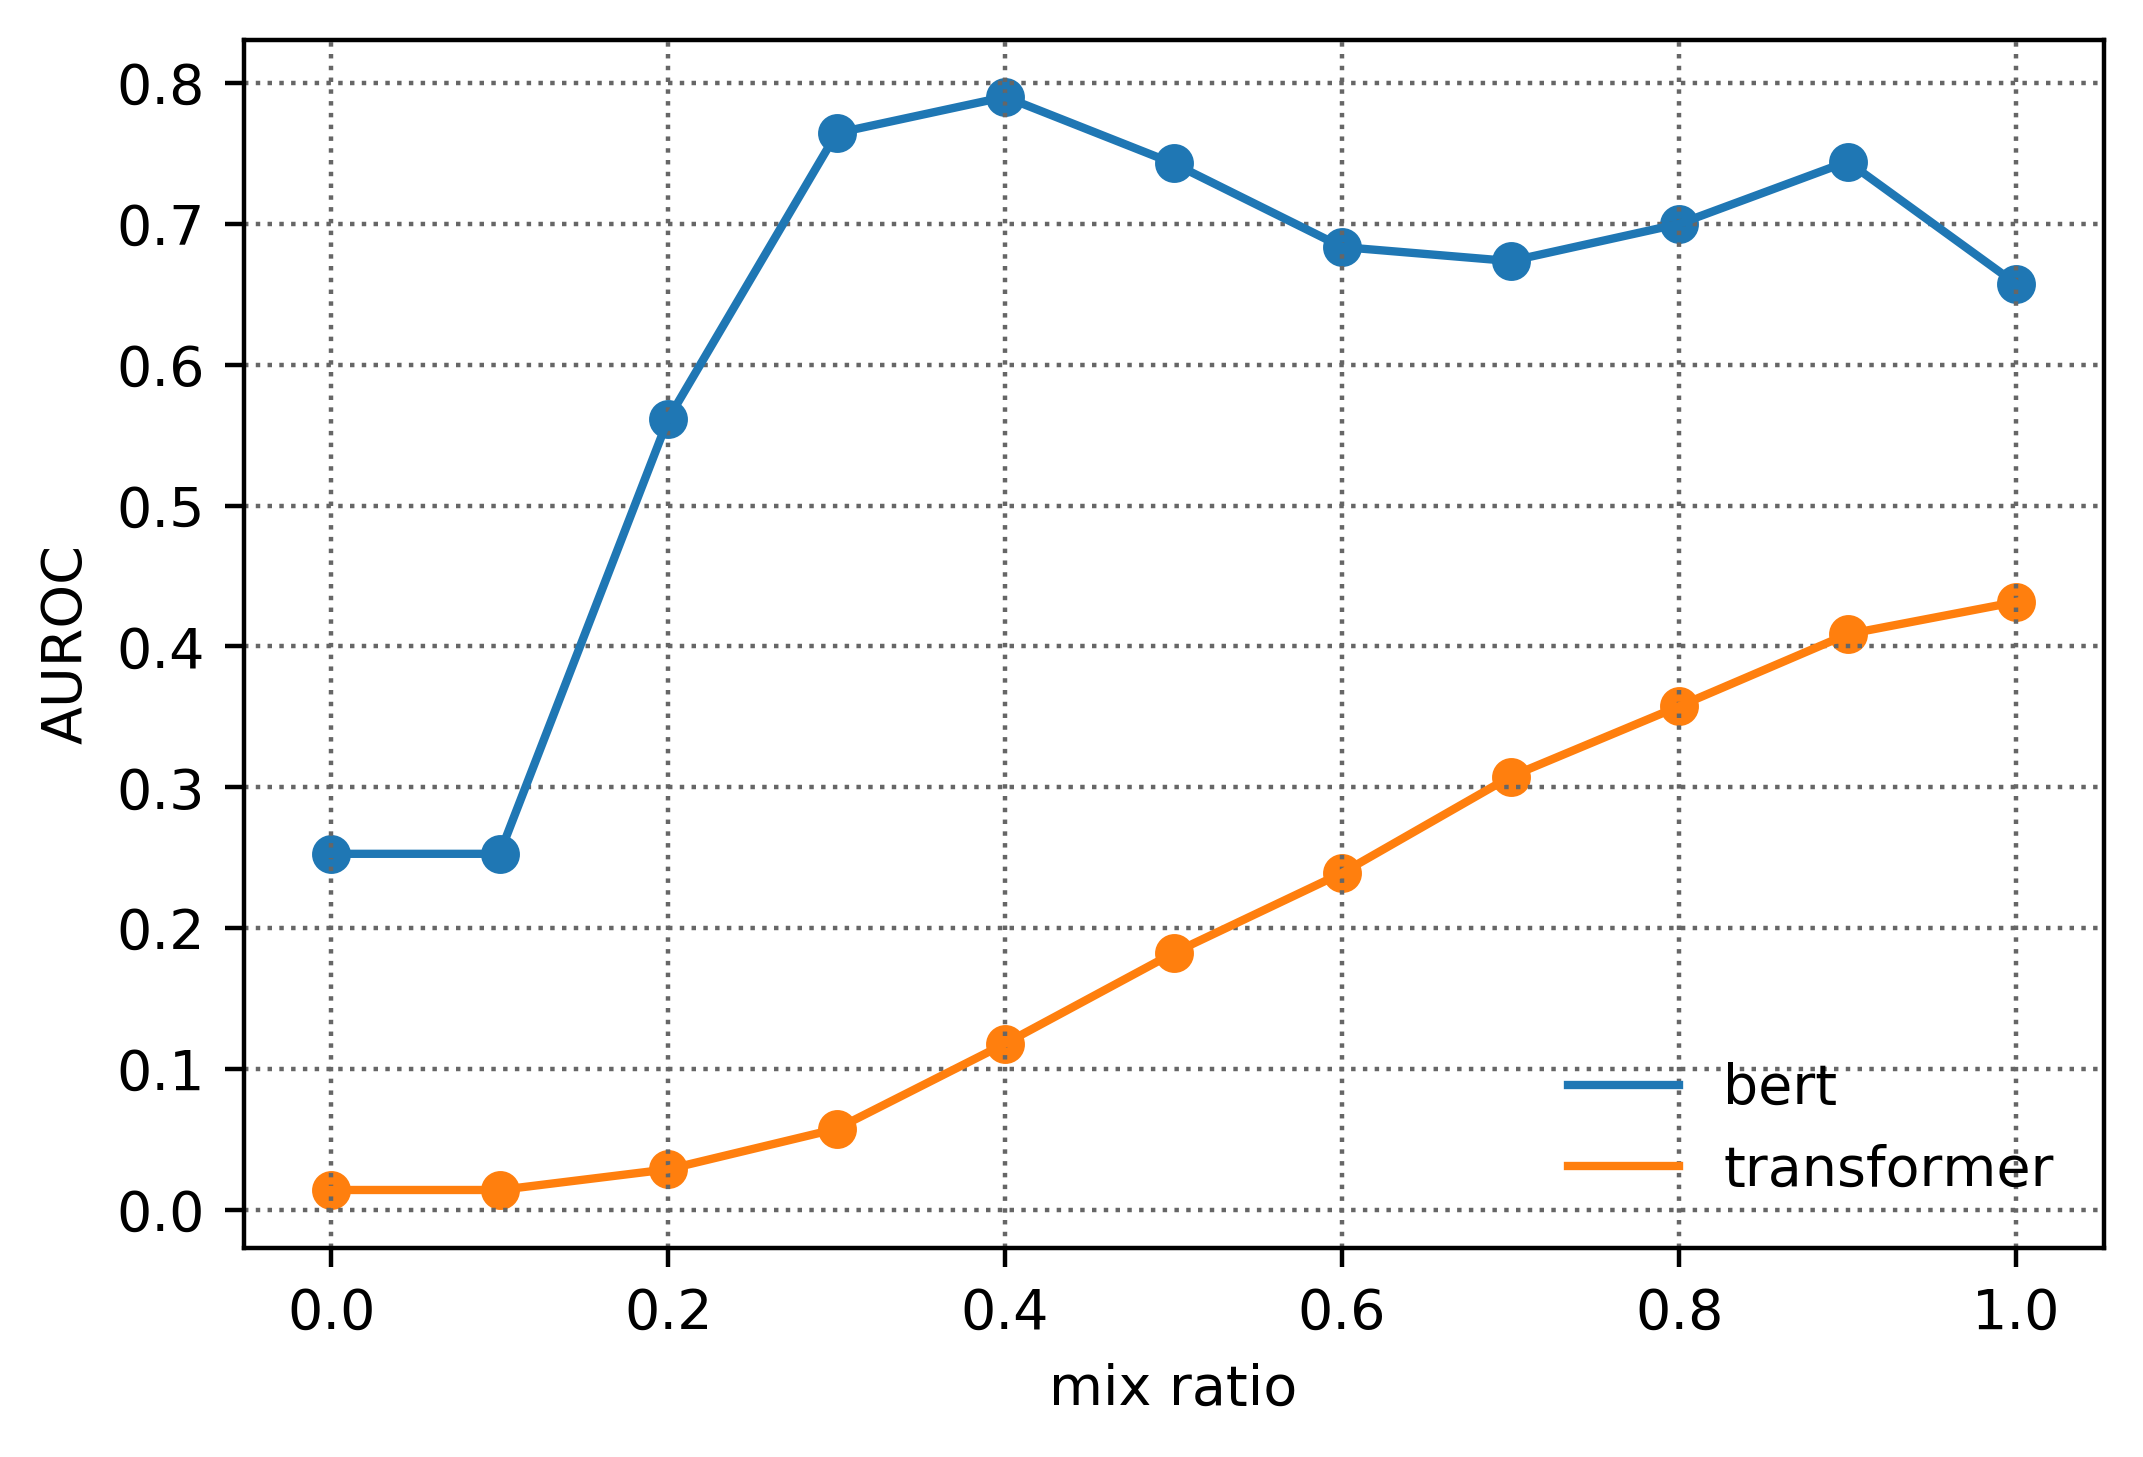

In [19]:
plt.figure(dpi=400)
plt.grid(b=False, which='major', color='#666666', linestyle=':')
plt.plot(ratio, auroc_list_pre, label='bert')
plt.scatter(ratio, auroc_list_pre)
plt.plot(ratio, auroc_list_scratch, label='transformer')
plt.scatter(ratio, auroc_list_scratch)
plt.xlabel('mix ratio')
plt.ylabel('AUROC')
plt.legend(frameon=False)
# plt.savefig('auroc_eng.png', dpi=400)

In [20]:
acc_list_scratch_md = []
auroc_list_scratch_md = []
for i in range(11):
    if i == 0:
        ood_df = pd.read_pickle("../english_only/test_descriptions_scratch")
        # temp = ood_df.copy()
    elif i == 10:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_1.0_scratch")
    else:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_0.{}_scratch".format(i))
    acc_list_scratch_md.append(sum(ood_df['gt'] == ood_df['pred']) / len(ood_df['gt']))
    
    argmax_prob_0 = np.array(list(ood_df[(ood_df['gt'] == 0)]['md'])).reshape(-1)
    
    temp = pd.read_pickle("../english_only/test_descriptions_scratch")
    argmax_prob_1 = np.array(list(temp[temp['gt'] == 1]['md'])).reshape(-1)
#     argmax_prob_1_1 = np.array(list(ood_df[ood_df['gt'] == 1]['md'])).reshape(-1)
#     argmax_prob_1_2 = np.array(list(ood_df[ood_df['gt'] == 2]['md'])).reshape(-1)
#     argmax_prob_1 = np.concatenate((argmax_prob_1_0, argmax_prob_1_1, argmax_prob_1_2), 0)
    all_max_prob = np.concatenate((-argmax_prob_1, -argmax_prob_0))
    
    label_1 = np.ones(len(argmax_prob_1))
    label_0 = np.zeros(len(argmax_prob_0))
    all_label = np.concatenate((label_1, label_0))
    
    auroc_list_scratch_md.append(roc_auc_score(all_label, all_max_prob))

In [21]:
acc_list_pre_md = []
auroc_list_pre_md = []
for i in range(11):
    if i == 0:
        ood_df = pd.read_pickle("../english_only/test_descriptions_pretrain")
        # temp = ood_df.copy()
    elif i == 10:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_1.0_pretrain")
    else:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_0.{}_pretrain".format(i))
    acc_list_pre_md.append(sum(ood_df['gt'] == ood_df['pred']) / len(ood_df['gt']))
    
    argmax_prob_0 = np.array(list(ood_df[(ood_df['gt'] == 0)]['md'])).reshape(-1)
    
    temp = pd.read_pickle("../english_only/test_descriptions_pretrain")
    argmax_prob_1 = np.array(list(temp[temp['gt'] == 1]['md'])).reshape(-1)
#     argmax_prob_1_1 = np.array(list(ood_df[ood_df['gt'] == 1]['md'])).reshape(-1)
#     argmax_prob_1_2 = np.array(list(ood_df[ood_df['gt'] == 2]['md'])).reshape(-1)
#     argmax_prob_1 = np.concatenate((argmax_prob_1_0, argmax_prob_1_1, argmax_prob_1_2), 0)
    all_max_prob = np.concatenate((-argmax_prob_1, -argmax_prob_0))
    
    label_1 = np.ones(len(argmax_prob_1))
    label_0 = np.zeros(len(argmax_prob_0))
    all_label = np.concatenate((label_1, label_0))
    
    auroc_list_pre_md.append(roc_auc_score(all_label, all_max_prob))

### AUROC plot (mahala)

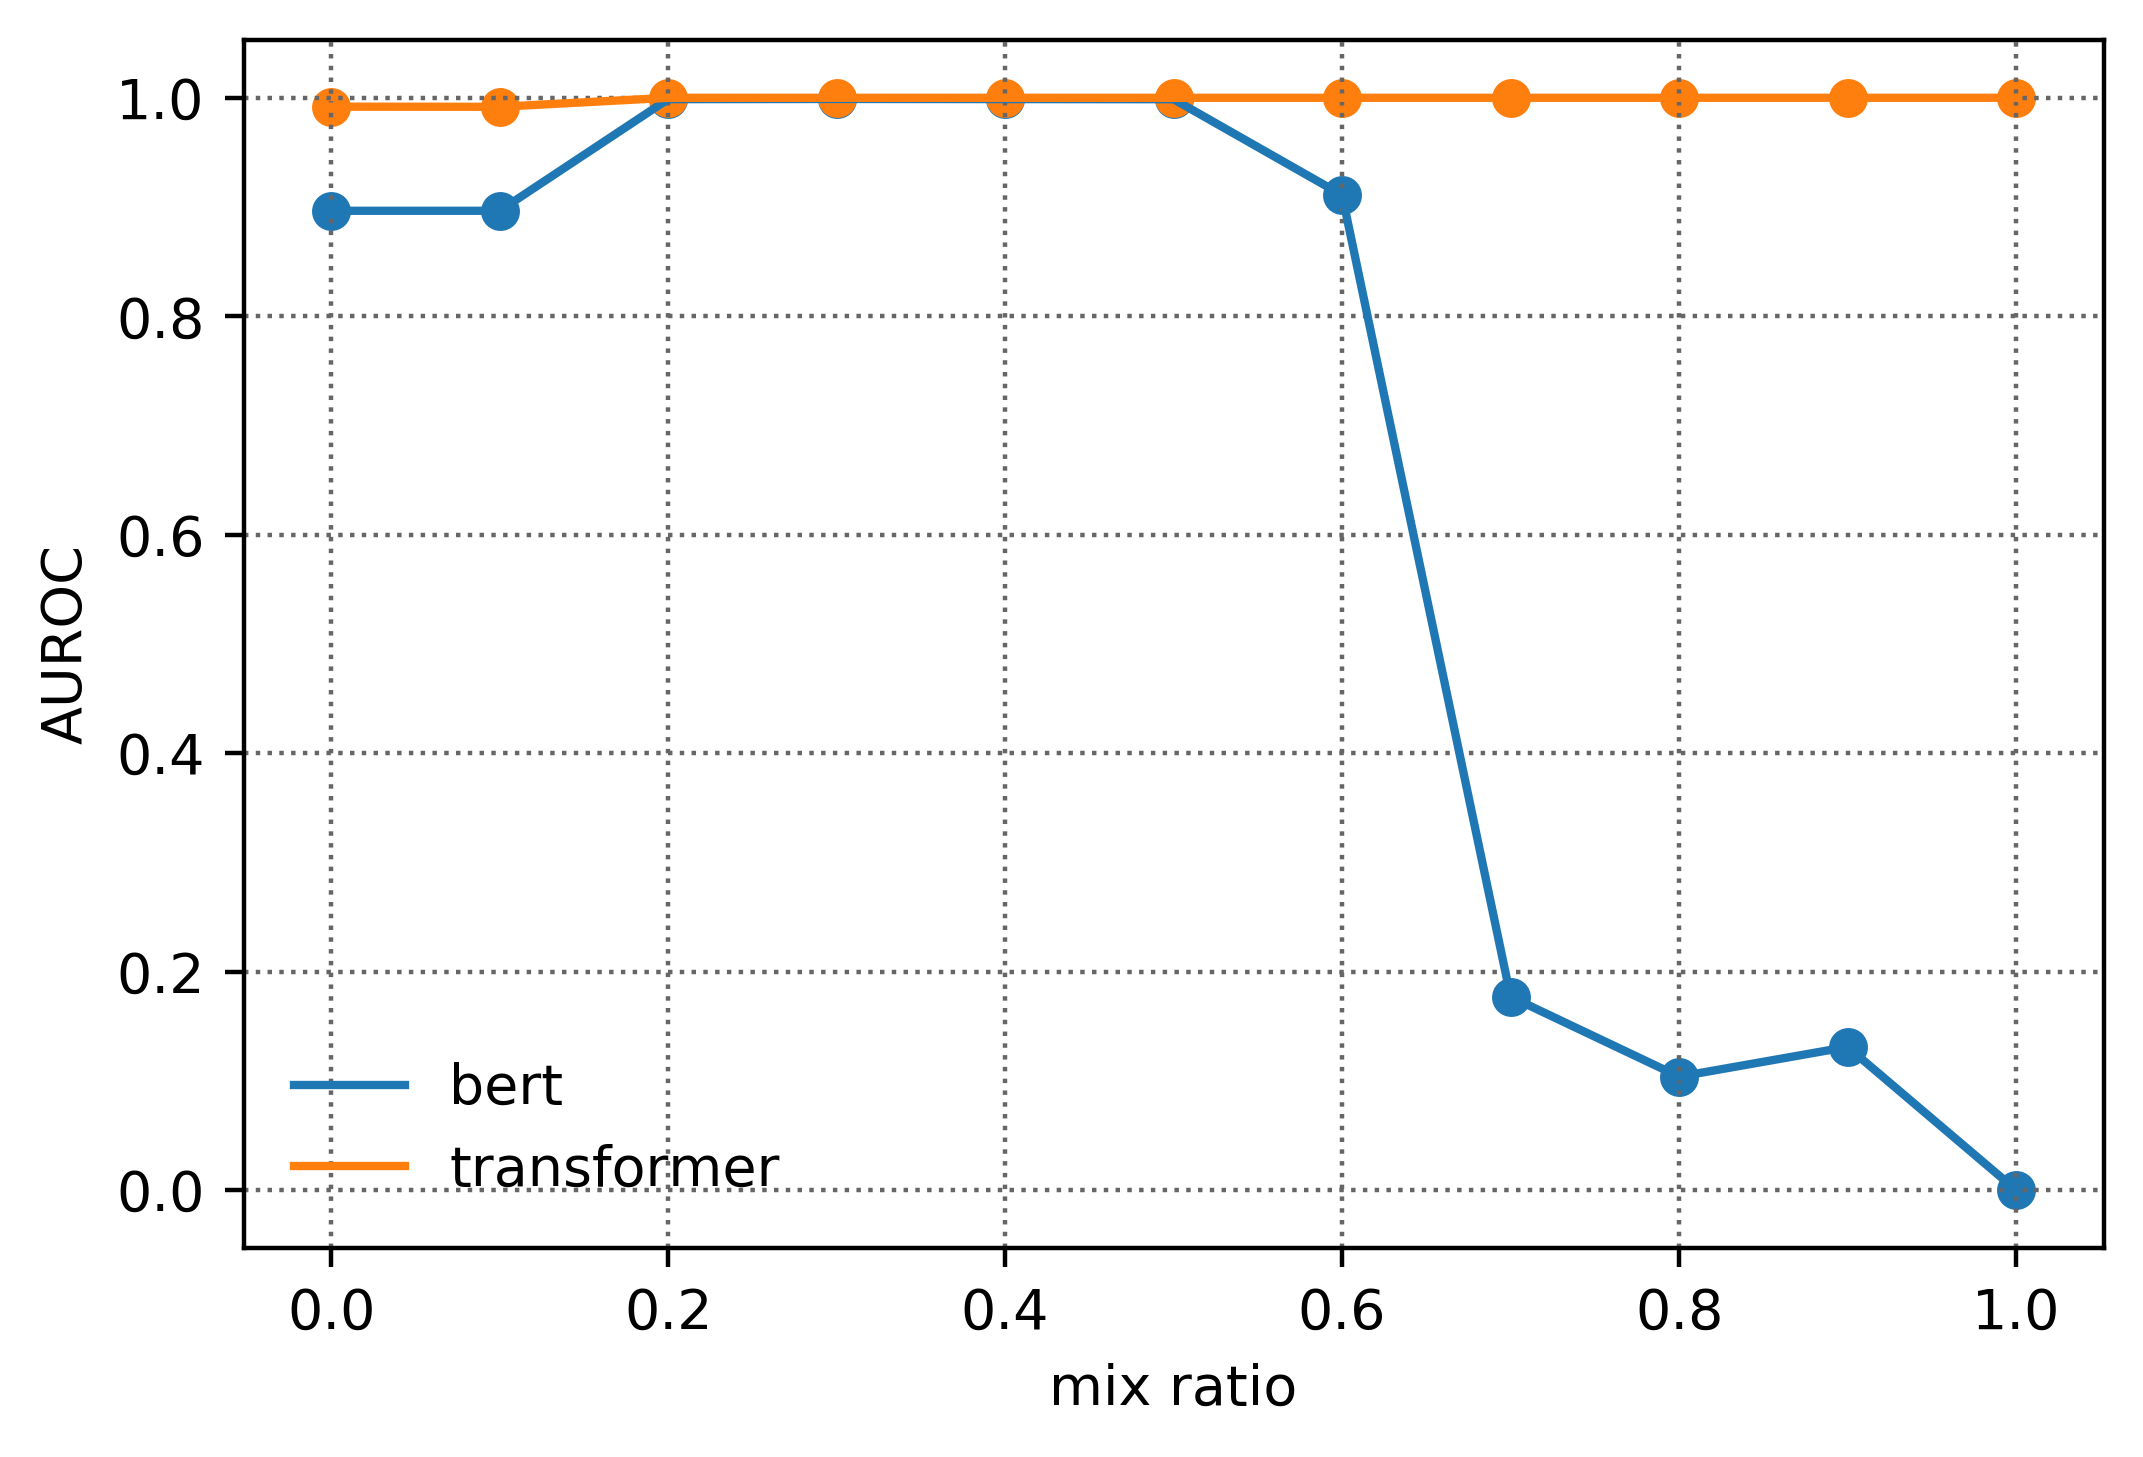

In [22]:
plt.figure(dpi=400)
plt.grid(b=False, which='major', color='#666666', linestyle=':')
plt.plot(ratio, auroc_list_pre_md, label='bert')
plt.scatter(ratio, auroc_list_pre_md)
plt.plot(ratio, auroc_list_scratch_md, label='transformer')
plt.scatter(ratio, auroc_list_scratch_md)
plt.xlabel('mix ratio')
plt.ylabel('AUROC')
plt.legend(frameon=False)
# plt.savefig('auroc_eng.png', dpi=400)

## German (i.e., OOD: English + Viet   /   In: German)

In [23]:
acc_list_scratch = []
auroc_list_scratch = []
for i in range(11):
    if i == 0:
        ood_df = pd.read_pickle("../english_only/test_descriptions_scratch")
        temp = ood_df.copy()
    elif i == 10:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_1.0_scratch")
    else:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_0.{}_scratch".format(i))
    acc_list_scratch.append(sum(ood_df['gt'] == ood_df['pred']) / len(ood_df['gt']))
    
    argmax_prob_0 = np.array(list(ood_df[(ood_df['gt'] == 0)]['argmax_prob'])).reshape(-1)
    
    argmax_prob_1 = np.array(list(temp[temp['gt'] == 2]['argmax_prob'])).reshape(-1)
#     argmax_prob_1_1 = np.array(list(ood_df[ood_df['gt'] == 1]['argmax_prob'])).reshape(-1)
#     argmax_prob_1_2 = np.array(list(ood_df[ood_df['gt'] == 2]['argmax_prob'])).reshape(-1)
#     argmax_prob_1 = np.concatenate((argmax_prob_1_0, argmax_prob_1_1, argmax_prob_1_2), 0)
    all_max_prob = np.concatenate((argmax_prob_1, argmax_prob_0))
    
    label_1 = np.ones(len(argmax_prob_1))
    label_0 = np.zeros(len(argmax_prob_0))
    all_label = np.concatenate((label_1, label_0))
    
    auroc_list_scratch.append(roc_auc_score(all_label, all_max_prob))

In [24]:
acc_list_pre = []
auroc_list_pre = []
for i in range(11):
    if i == 0:
        ood_df = pd.read_pickle("../english_only/test_descriptions_pretrain")
        temp = ood_df.copy()
    elif i == 10:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_1.0_pretrain")
    else:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_0.{}_pretrain".format(i))
    acc_list_pre.append(sum(ood_df['gt'] == ood_df['pred']) / len(ood_df['gt']))
    
    argmax_prob_0 = np.array(list(ood_df[(ood_df['gt'] == 0)]['argmax_prob'])).reshape(-1)
    
    argmax_prob_1 = np.array(list(temp[temp['gt'] == 2]['argmax_prob'])).reshape(-1)
#     argmax_prob_1_1 = np.array(list(ood_df[ood_df['gt'] == 1]['argmax_prob'])).reshape(-1)
#     argmax_prob_1_2 = np.array(list(ood_df[ood_df['gt'] == 2]['argmax_prob'])).reshape(-1)
#     argmax_prob_1 = np.concatenate((argmax_prob_1_0, argmax_prob_1_1, argmax_prob_1_2), 0)
    all_max_prob = np.concatenate((argmax_prob_1, argmax_prob_0))
    
    label_1 = np.ones(len(argmax_prob_1))
    label_0 = np.zeros(len(argmax_prob_0))
    all_label = np.concatenate((label_1, label_0))
    
    auroc_list_pre.append(roc_auc_score(all_label, all_max_prob))

### AUROC plot (max)

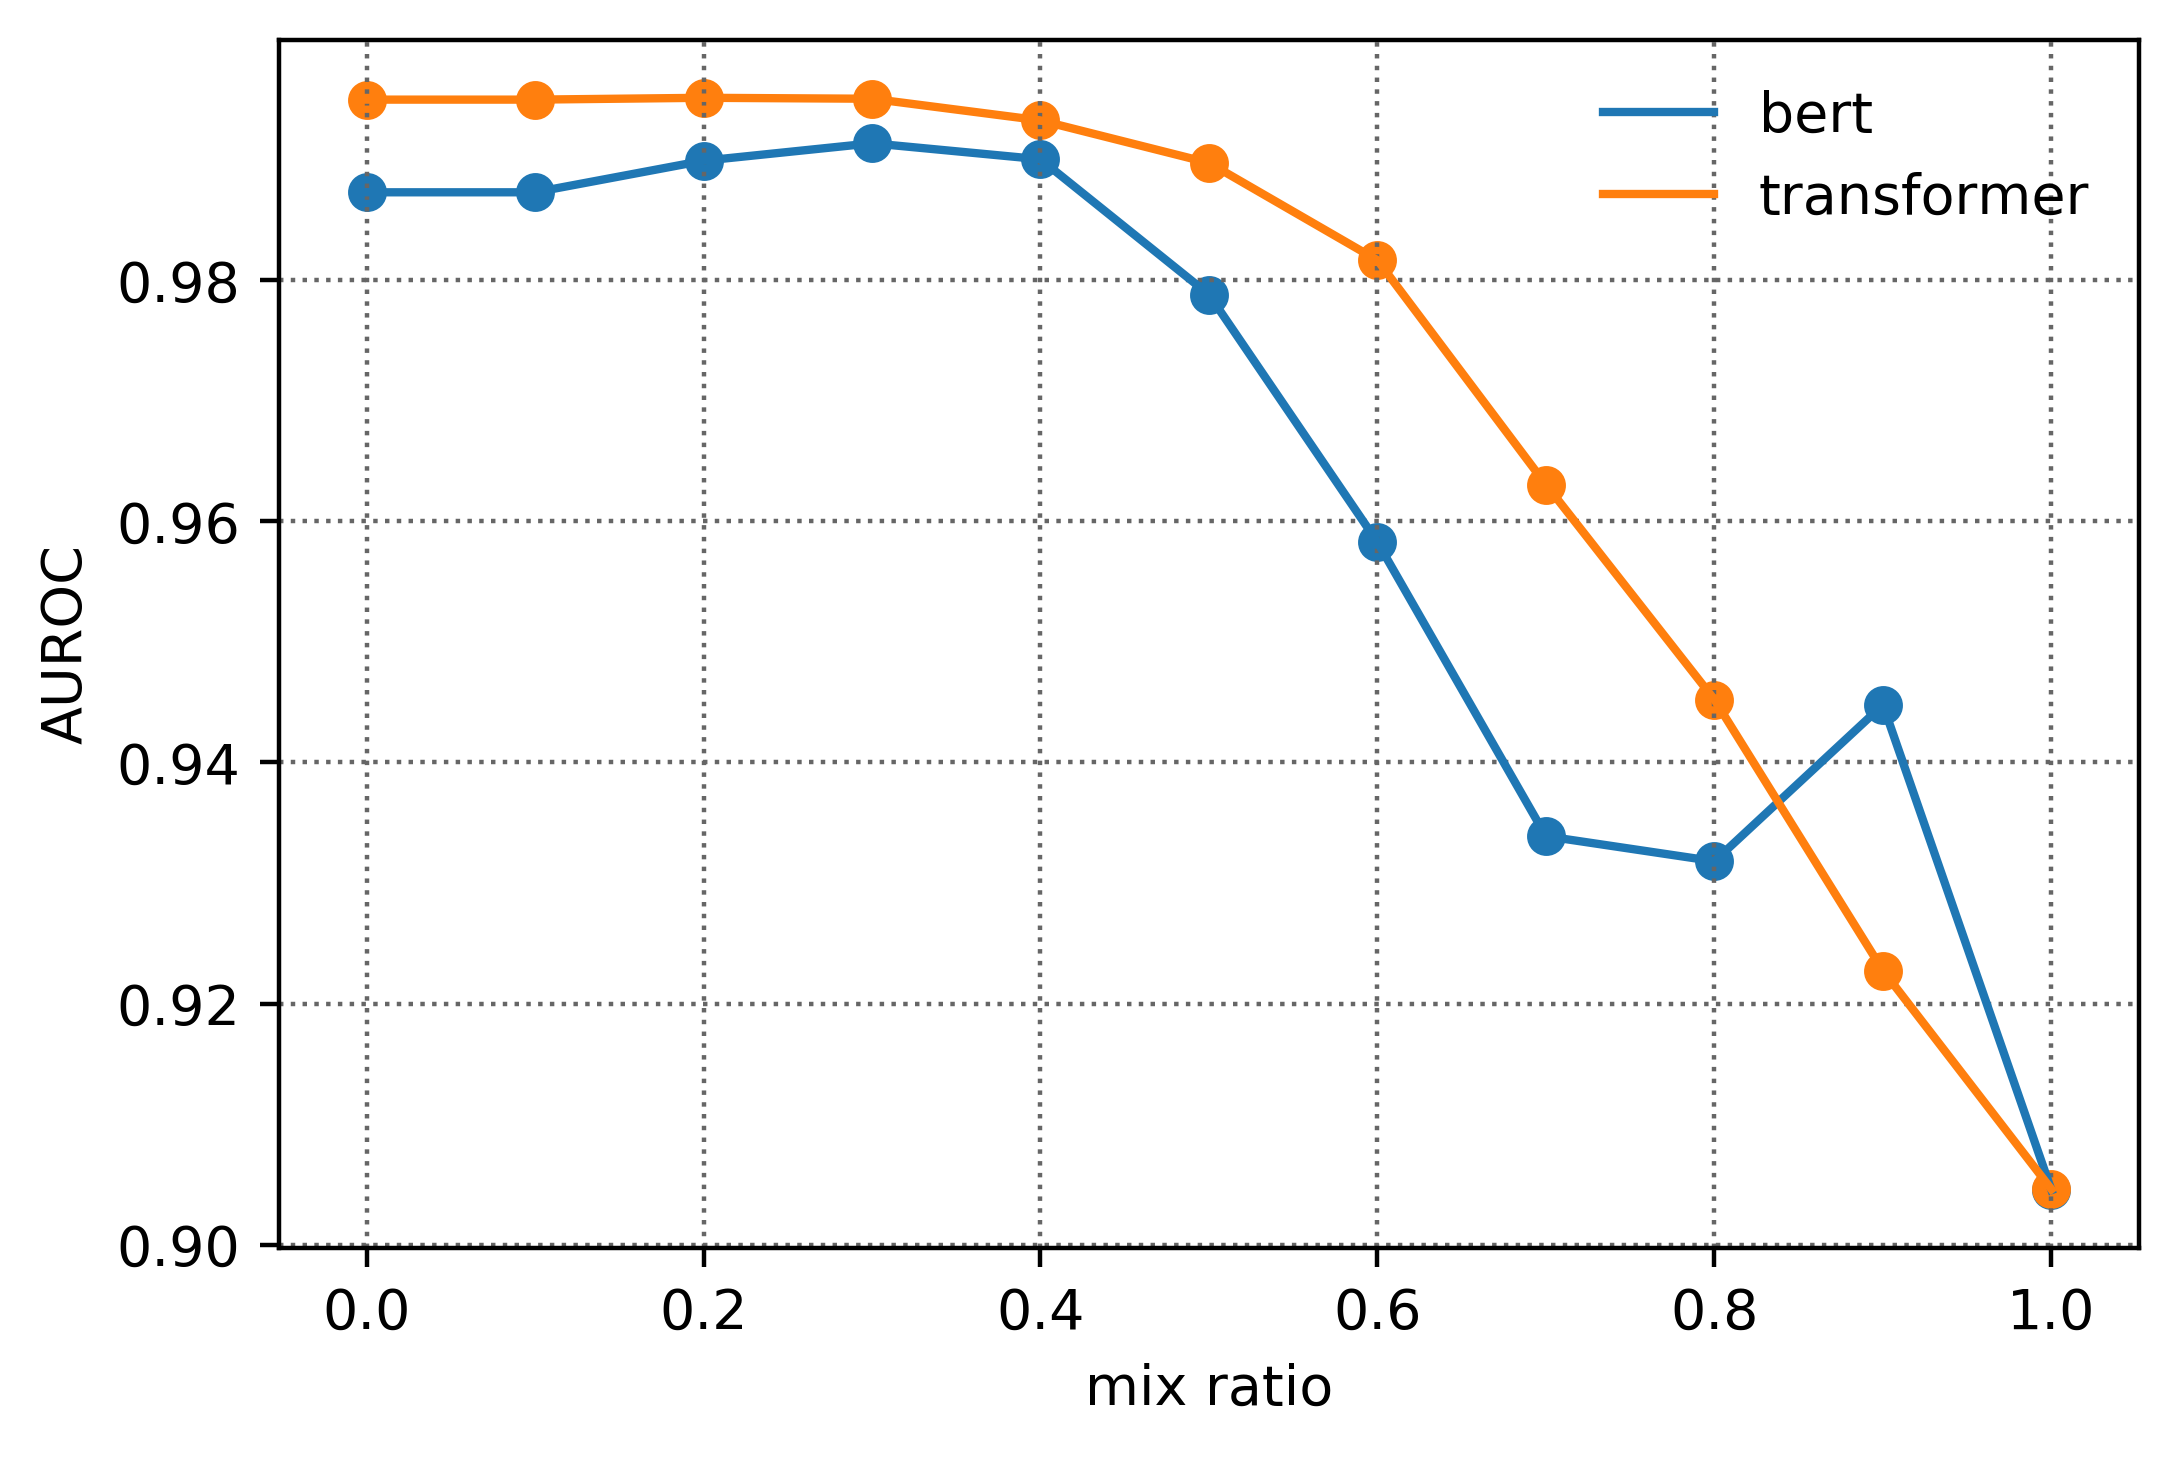

In [25]:
plt.figure(dpi=400)
plt.grid(b=False, which='major', color='#666666', linestyle=':')
plt.plot(ratio, auroc_list_pre, label='bert')
plt.scatter(ratio, auroc_list_pre)
plt.plot(ratio, auroc_list_scratch, label='transformer')
plt.scatter(ratio, auroc_list_scratch)
plt.xlabel('mix ratio')
plt.ylabel('AUROC')
plt.legend(frameon=False)
# plt.savefig('auroc_eng.png', dpi=400)

In [26]:
acc_list_scratch_md = []
auroc_list_scratch_md = []
for i in range(11):
    if i == 0:
        ood_df = pd.read_pickle("../english_only/test_descriptions_scratch")
        # temp = ood_df.copy()
    elif i == 10:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_1.0_scratch")
    else:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_0.{}_scratch".format(i))
    acc_list_scratch_md.append(sum(ood_df['gt'] == ood_df['pred']) / len(ood_df['gt']))
    
    argmax_prob_0 = np.array(list(ood_df[(ood_df['gt'] == 0)]['md'])).reshape(-1)
    
    temp = pd.read_pickle("../english_only/test_descriptions_scratch")
    argmax_prob_1 = np.array(list(temp[temp['gt'] == 2]['md'])).reshape(-1)
#     argmax_prob_1_1 = np.array(list(ood_df[ood_df['gt'] == 1]['md'])).reshape(-1)
#     argmax_prob_1_2 = np.array(list(ood_df[ood_df['gt'] == 2]['md'])).reshape(-1)
#     argmax_prob_1 = np.concatenate((argmax_prob_1_0, argmax_prob_1_1, argmax_prob_1_2), 0)
    all_max_prob = np.concatenate((-argmax_prob_1, -argmax_prob_0))
    
    label_1 = np.ones(len(argmax_prob_1))
    label_0 = np.zeros(len(argmax_prob_0))
    all_label = np.concatenate((label_1, label_0))
    
    auroc_list_scratch_md.append(roc_auc_score(all_label, all_max_prob))

In [27]:
acc_list_pre_md = []
auroc_list_pre_md = []
for i in range(11):
    if i == 0:
        ood_df = pd.read_pickle("../english_only/test_descriptions_pretrain")
        # temp = ood_df.copy()
    elif i == 10:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_1.0_pretrain")
    else:
        ood_df = pd.read_pickle("../english_only/ood_descriptions_0.{}_pretrain".format(i))
    acc_list_pre_md.append(sum(ood_df['gt'] == ood_df['pred']) / len(ood_df['gt']))
    
    argmax_prob_0 = np.array(list(ood_df[(ood_df['gt'] == 0)]['md'])).reshape(-1)
    
    temp = pd.read_pickle("../english_only/test_descriptions_pretrain")
    argmax_prob_1 = np.array(list(temp[temp['gt'] == 2]['md'])).reshape(-1)
#     argmax_prob_1_1 = np.array(list(ood_df[ood_df['gt'] == 1]['md'])).reshape(-1)
#     argmax_prob_1_2 = np.array(list(ood_df[ood_df['gt'] == 2]['md'])).reshape(-1)
#     argmax_prob_1 = np.concatenate((argmax_prob_1_0, argmax_prob_1_1, argmax_prob_1_2), 0)
    all_max_prob = np.concatenate((-argmax_prob_1, -argmax_prob_0))
    
    label_1 = np.ones(len(argmax_prob_1))
    label_0 = np.zeros(len(argmax_prob_0))
    all_label = np.concatenate((label_1, label_0))
    
    auroc_list_pre_md.append(roc_auc_score(all_label, all_max_prob))

### AUROC plot (mahala)

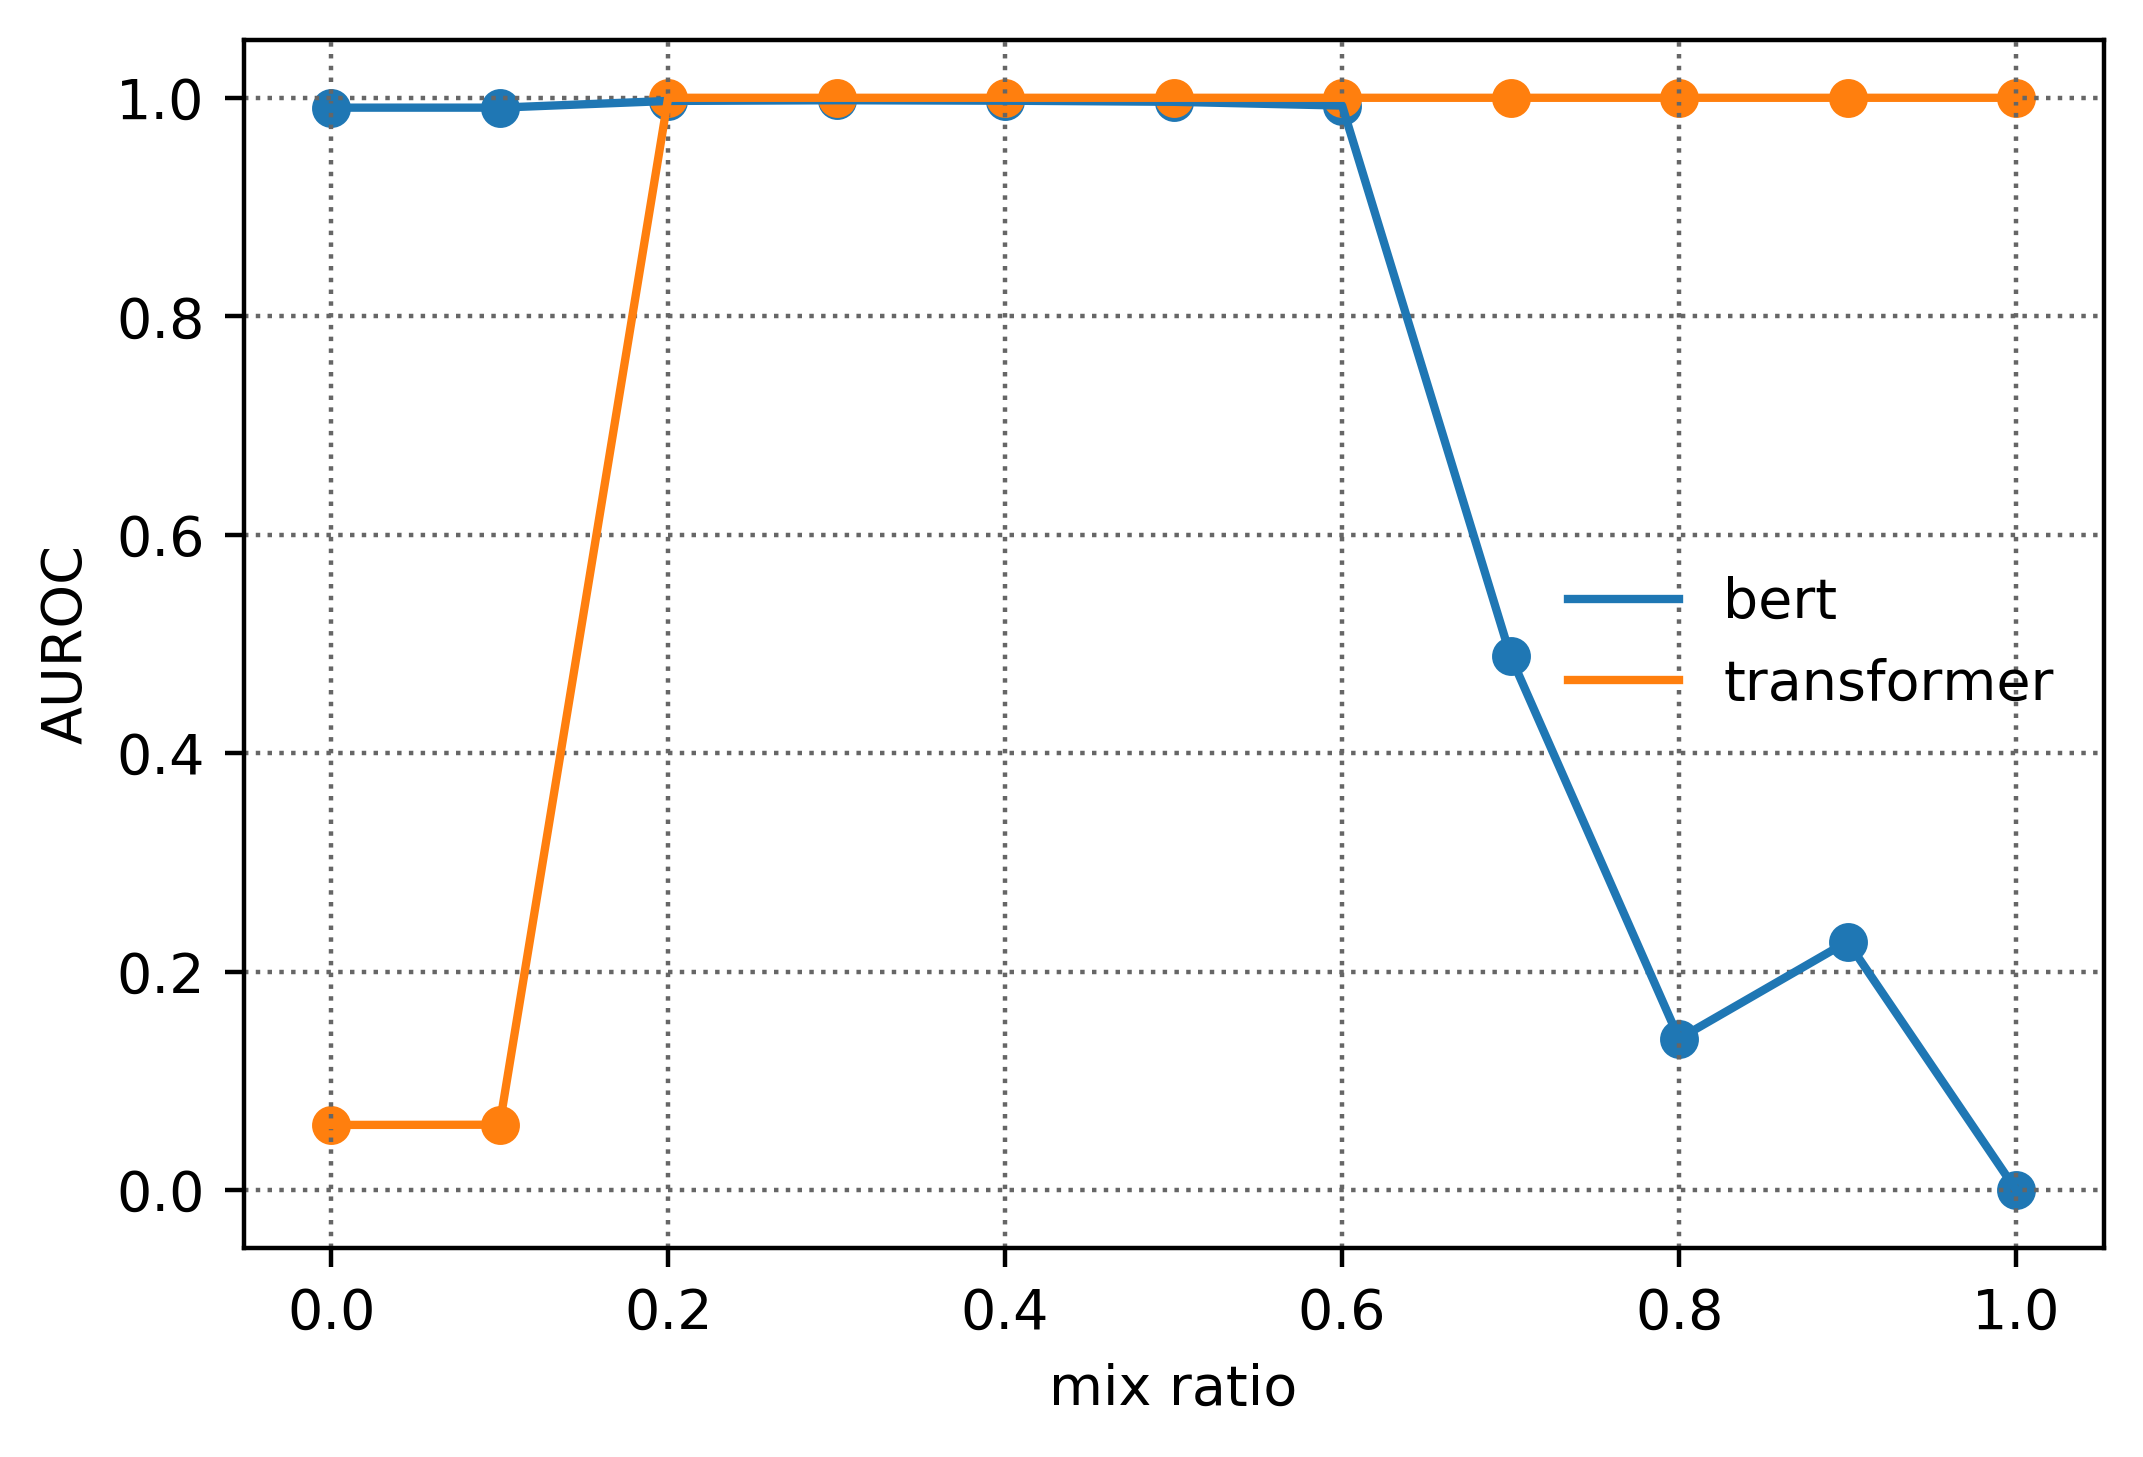

In [28]:
plt.figure(dpi=400)
plt.grid(b=False, which='major', color='#666666', linestyle=':')
plt.plot(ratio, auroc_list_pre_md, label='bert')
plt.scatter(ratio, auroc_list_pre_md)
plt.plot(ratio, auroc_list_scratch_md, label='transformer')
plt.scatter(ratio, auroc_list_scratch_md)
plt.xlabel('mix ratio')
plt.ylabel('AUROC')
plt.legend(frameon=False)
# plt.savefig('auroc_eng.png', dpi=400)